In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Dataset/Top 100 Bussiest Airports in the World - Sheet2.csv')

In [3]:
data.replace(',','', regex=True, inplace=True)

In [4]:
data.head()

,Rank,Airport,Code,Location,Country,Passengers
0,1,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,United States,103902992
1,2,Beijing Capital International Airport,PEK,Beijing,China,95786442
2,3,Dubai International Airport,DXB,Dubai,United Arab Emirates,88242099
3,4,Los Angeles International Airport,LAX,Los Angeles,United States,84557968
4,5,O'Hare International Airport,ORD,Chicago,United States,79828183


In [5]:
data['Passengers'] = pd.to_numeric(data["Passengers"], downcast="integer")

In [6]:
data.head()

,Rank,Airport,Code,Location,Country,Passengers
0,1,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,United States,103902992
1,2,Beijing Capital International Airport,PEK,Beijing,China,95786442
2,3,Dubai International Airport,DXB,Dubai,United Arab Emirates,88242099
3,4,Los Angeles International Airport,LAX,Los Angeles,United States,84557968
4,5,O'Hare International Airport,ORD,Chicago,United States,79828183


In [7]:
#stufff data.Country.value_counts()
# creating a list of countrys that have the most airports. Desc order
lst = []
for idx, num in enumerate(data.Country.value_counts().index.tolist()):
    lst.append((num, data.Country.value_counts()[idx]))
    
    

In [8]:
# list of tuple from country and count 
lst 

[('United States', 25),
 ('China', 16),
 ('United Kingdom', 4),
 ('Japan', 4),
 ('Australia', 3),
 ('Germany', 3),
 ('Turkey', 3),
 ('India', 3),
 ('Spain', 3),
 ('South Korea', 3),
 ('Thailand', 2),
 ('Russia', 2),
 ('Mexico', 2),
 ('Canada', 2),
 ('Saudi Arabia', 2),
 ('United Arab Emirates', 2),
 ('Switzerland', 1),
 ('Qatar', 1),
 ('Norway', 1),
 ('Portugal', 1),
 ('Sweden', 1),
 ('Belgium', 1),
 ('Ireland', 1),
 ('Colombia', 1),
 ('Denmark', 1),
 ('Taiwan', 1),
 ('Vietnam', 1),
 ('Brazil', 1),
 ('Italy', 1),
 ('Philippines', 1),
 ('Malaysia', 1),
 ('Singapore', 1),
 ('Indonesia', 1),
 ('Netherlands', 1),
 ('France', 1),
 ('Hong Kong', 1),
 ('Austria', 1)]

C:\Users\Edwin\AppData\Local\Temp\ipykernel_17252\2349413281.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,10))


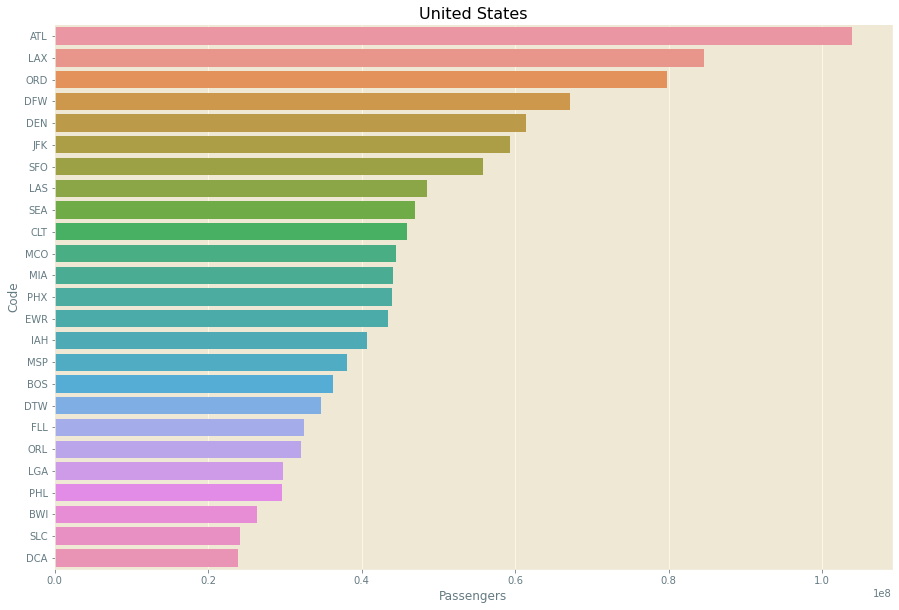

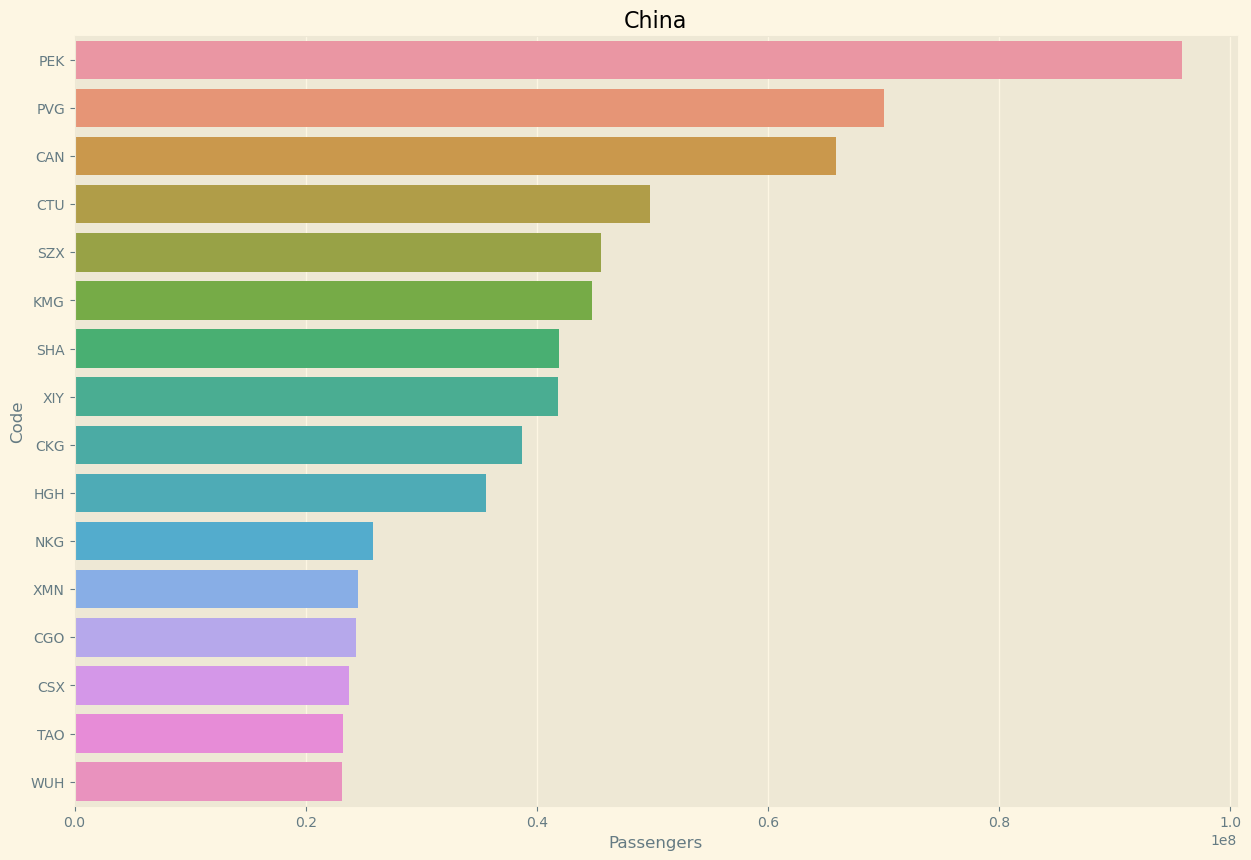

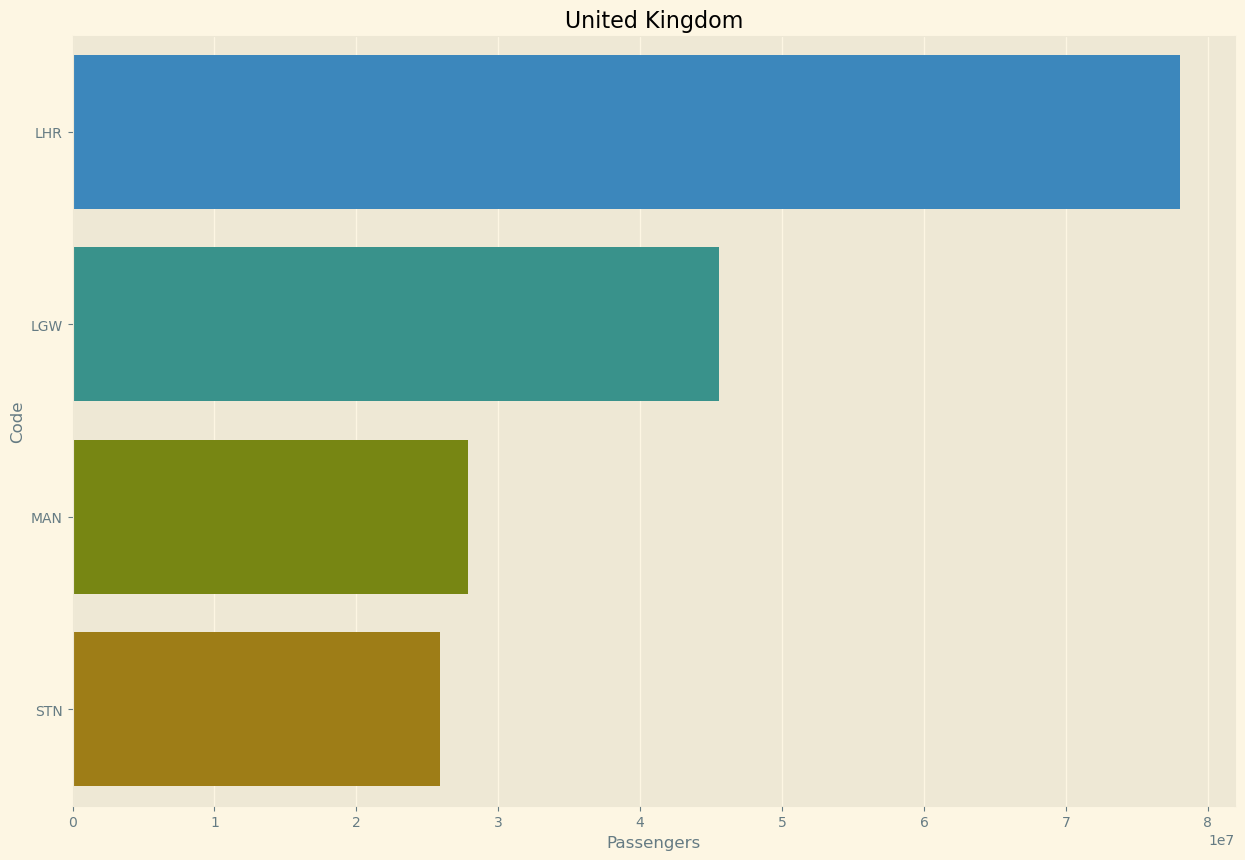

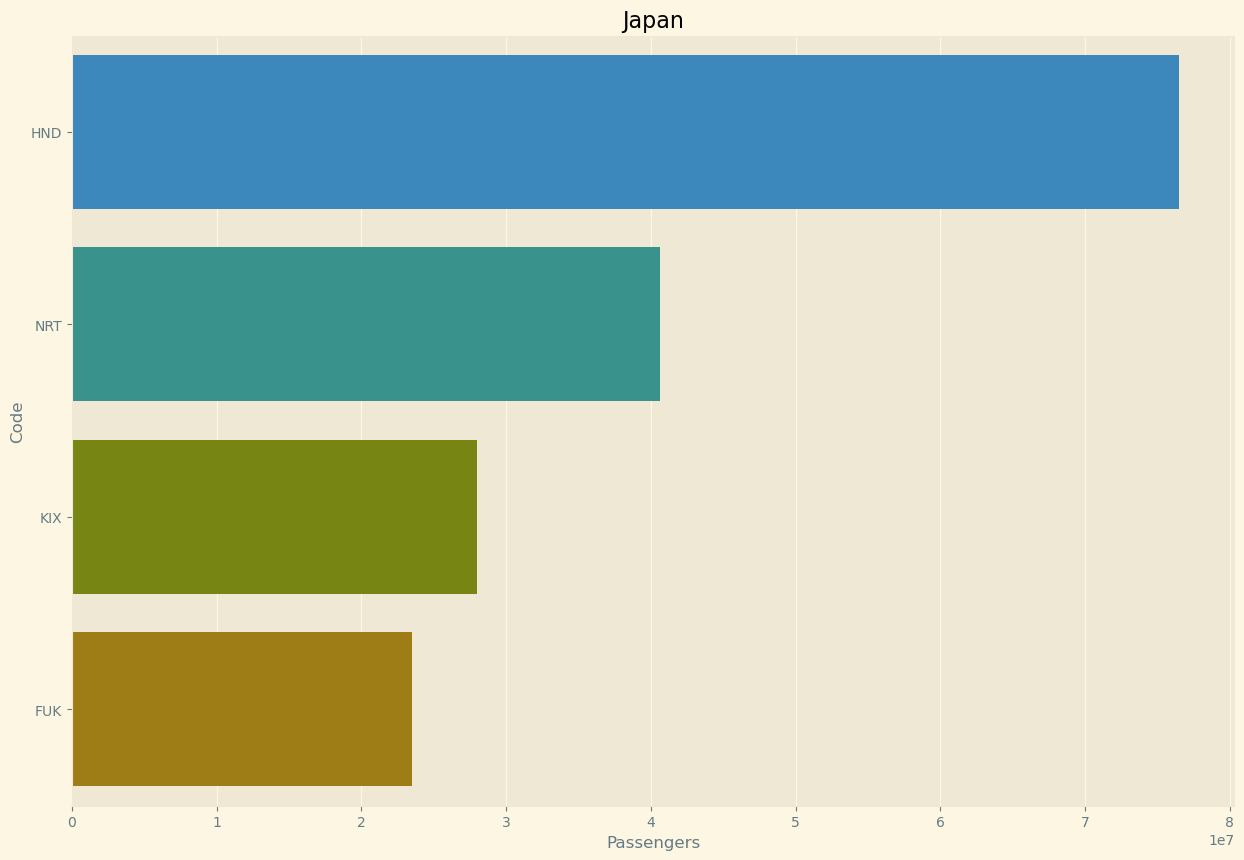

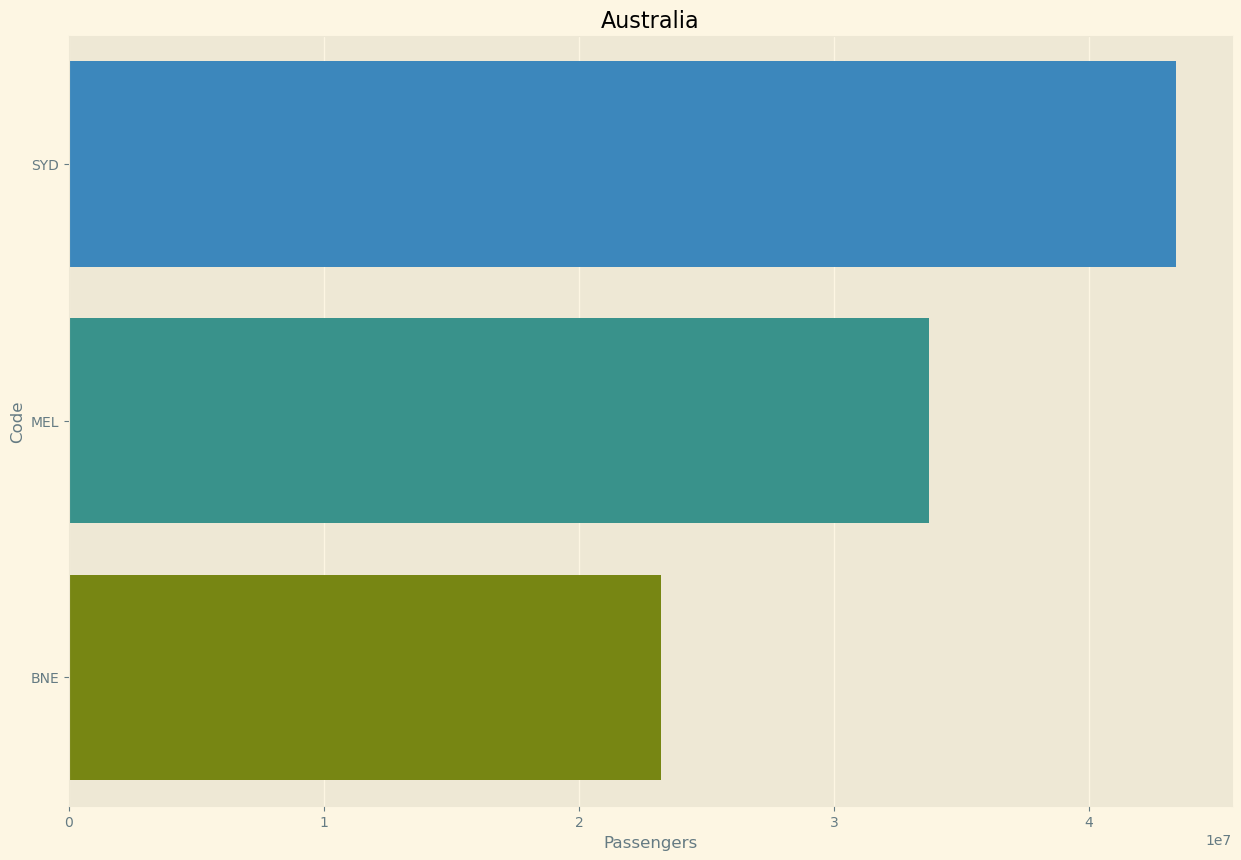

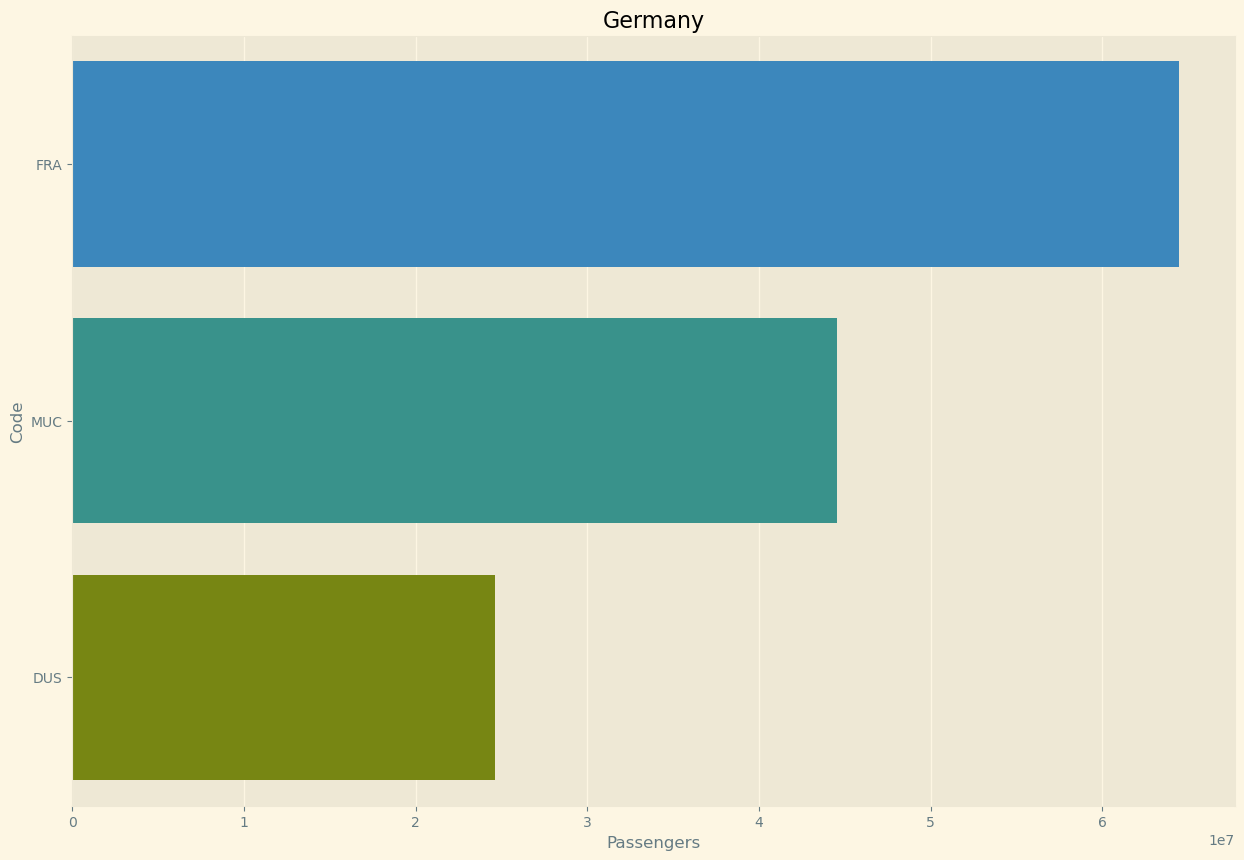

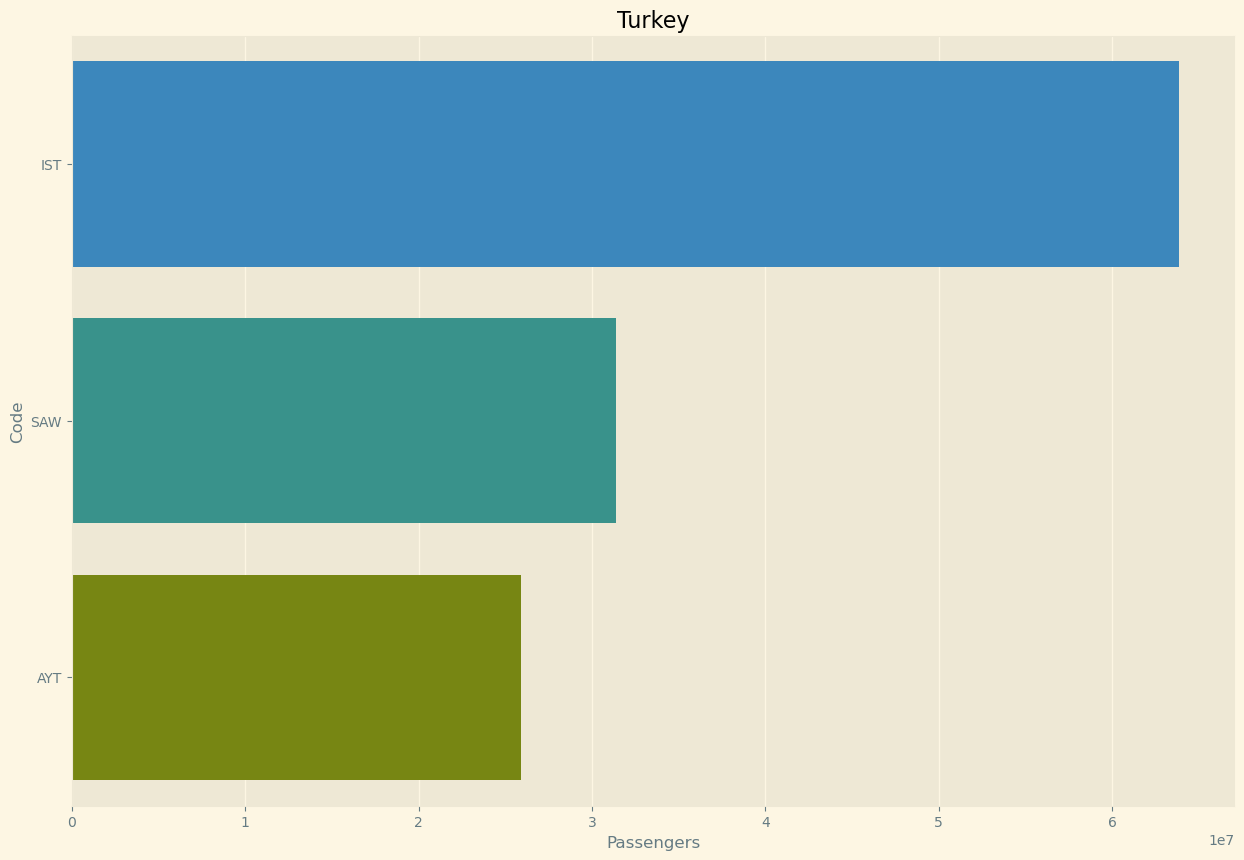

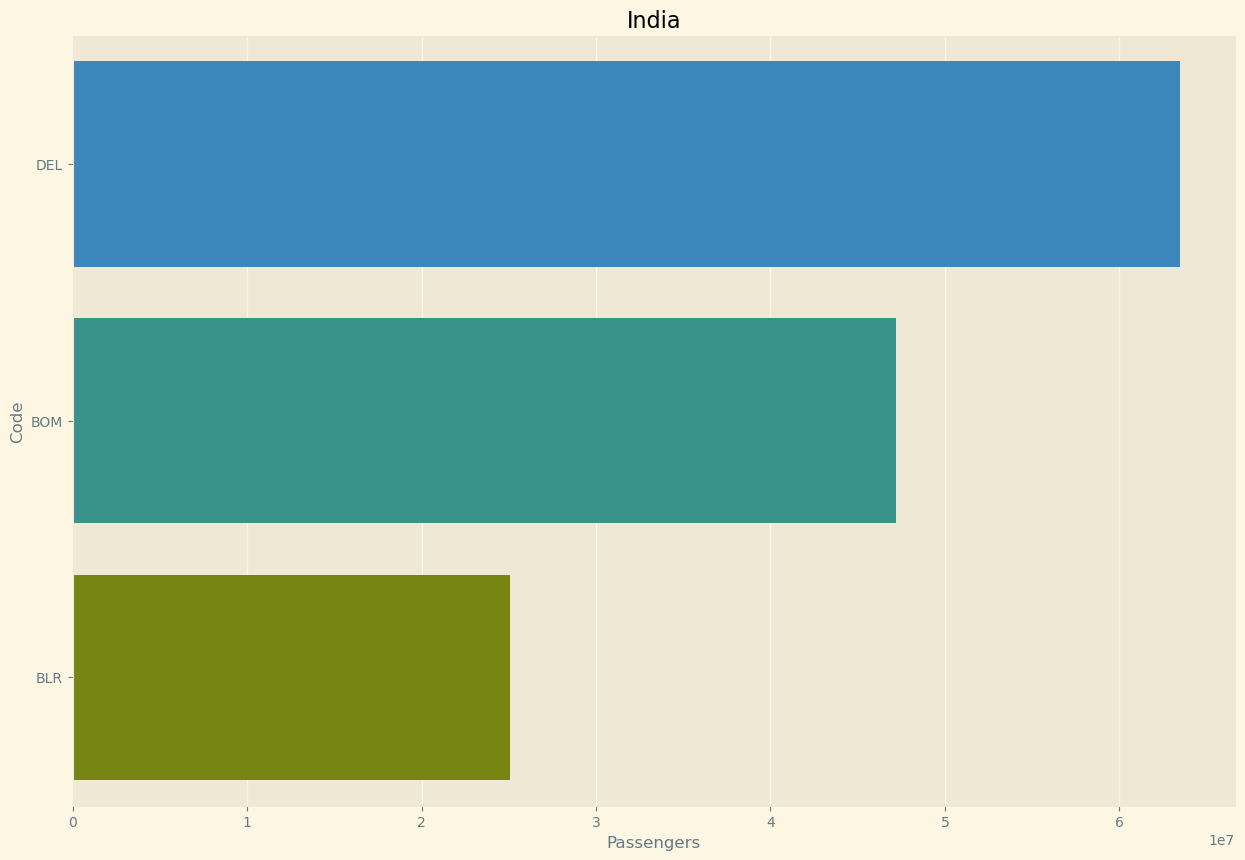

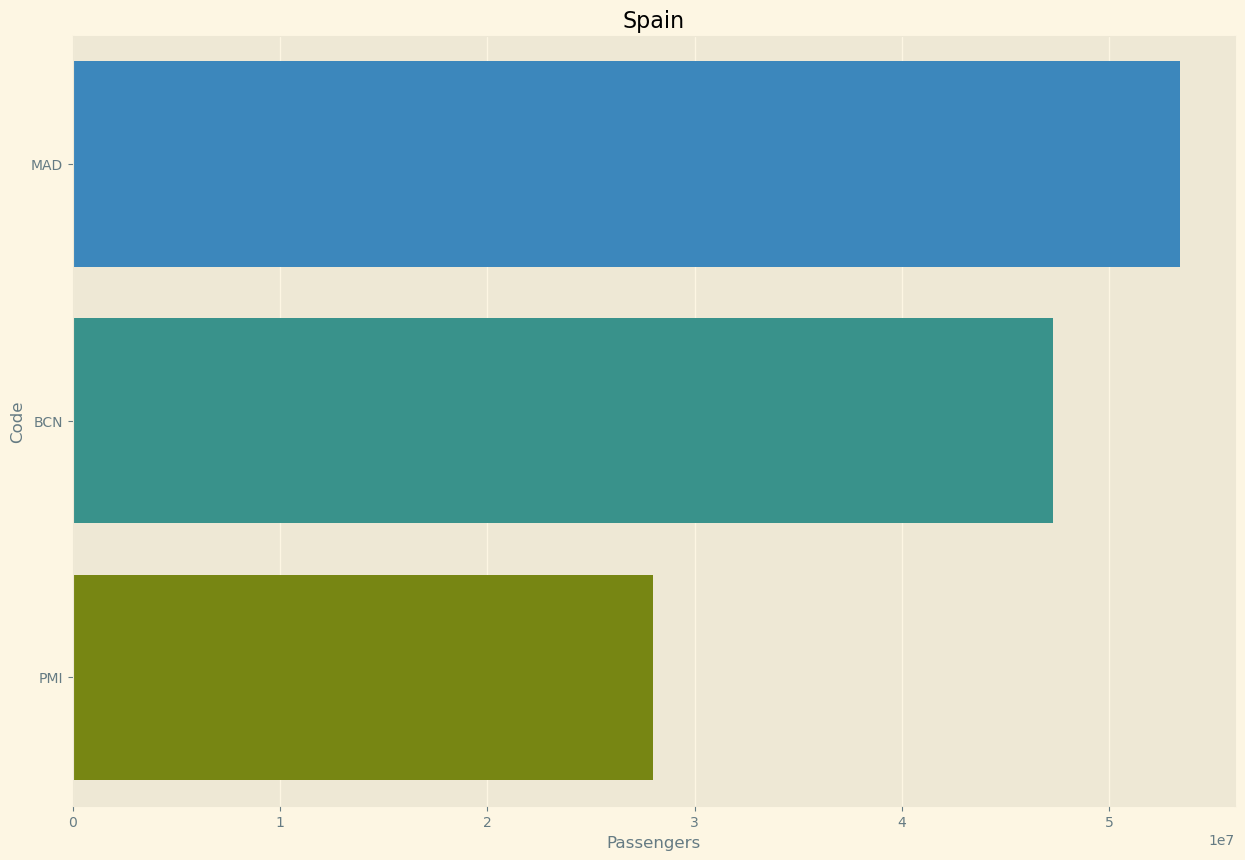

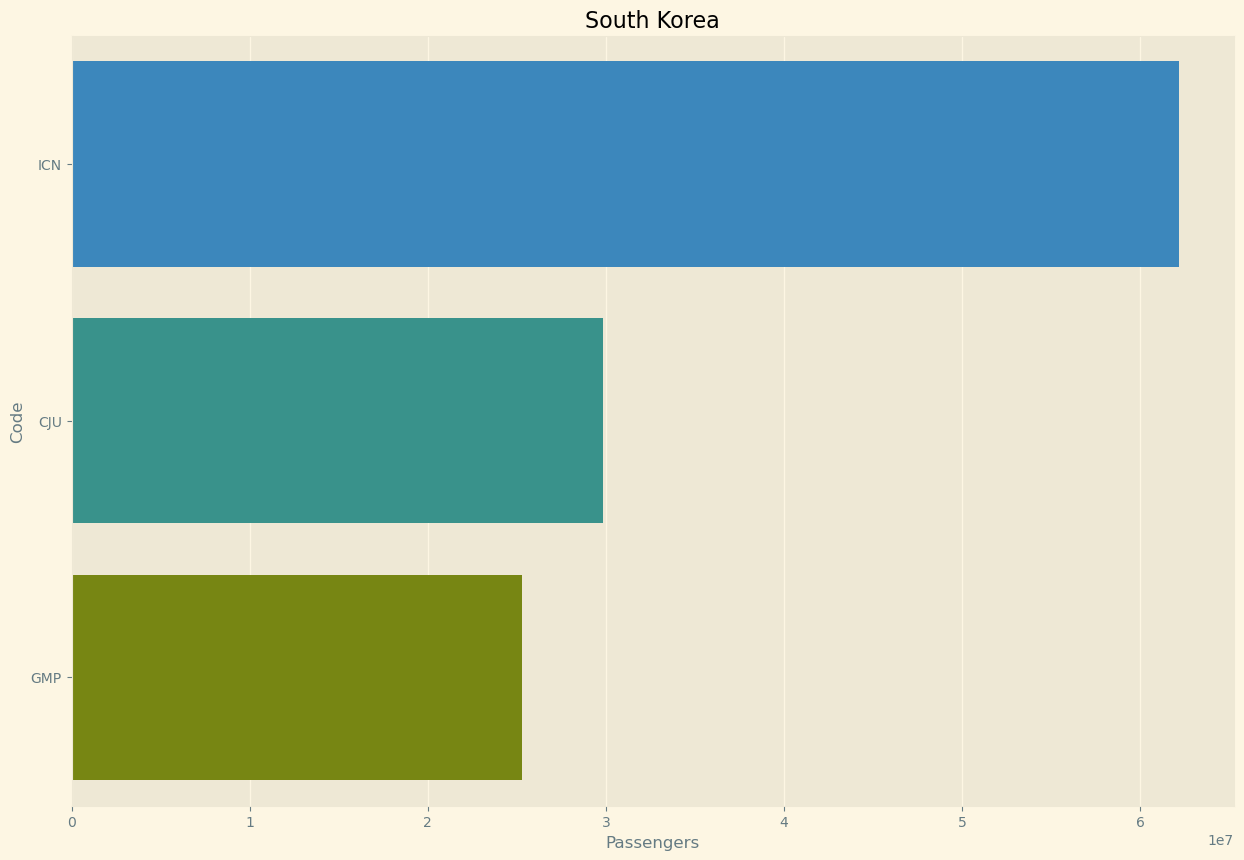

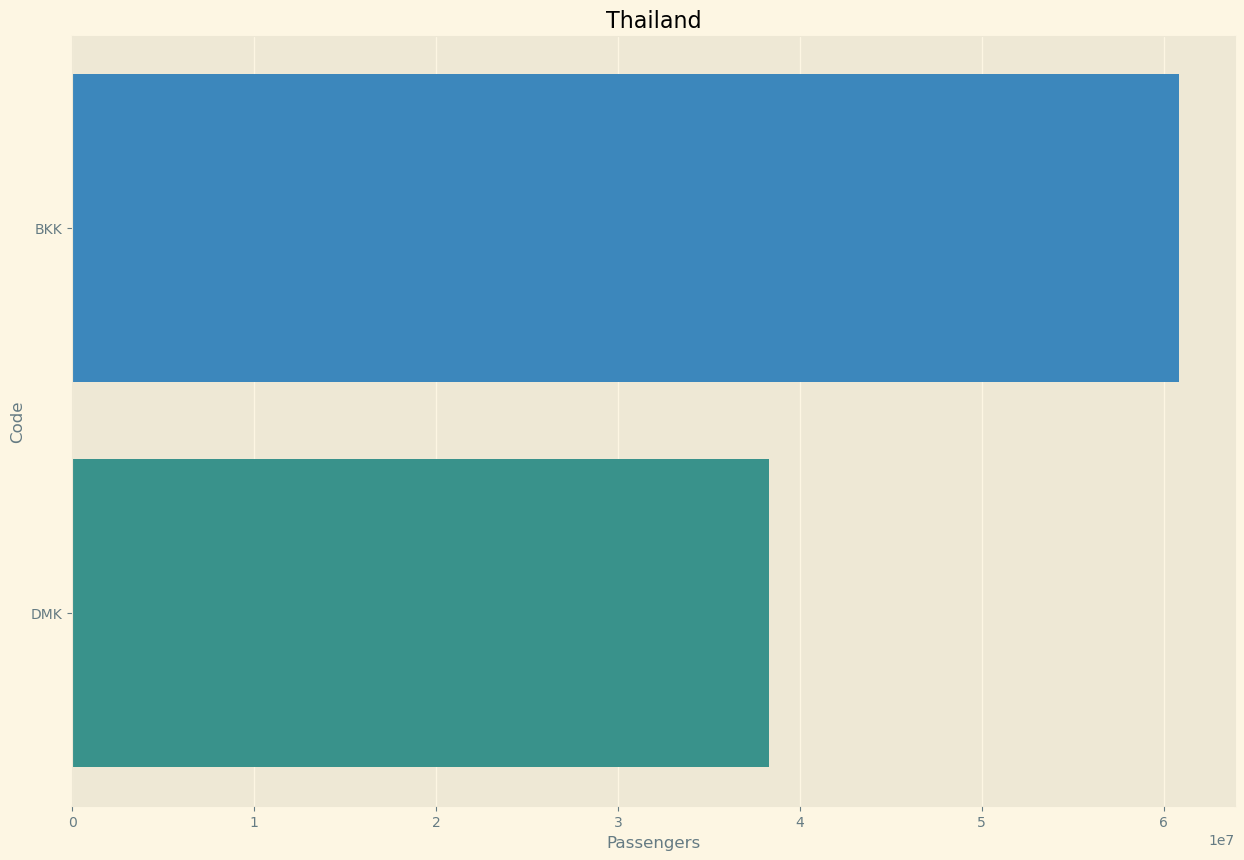

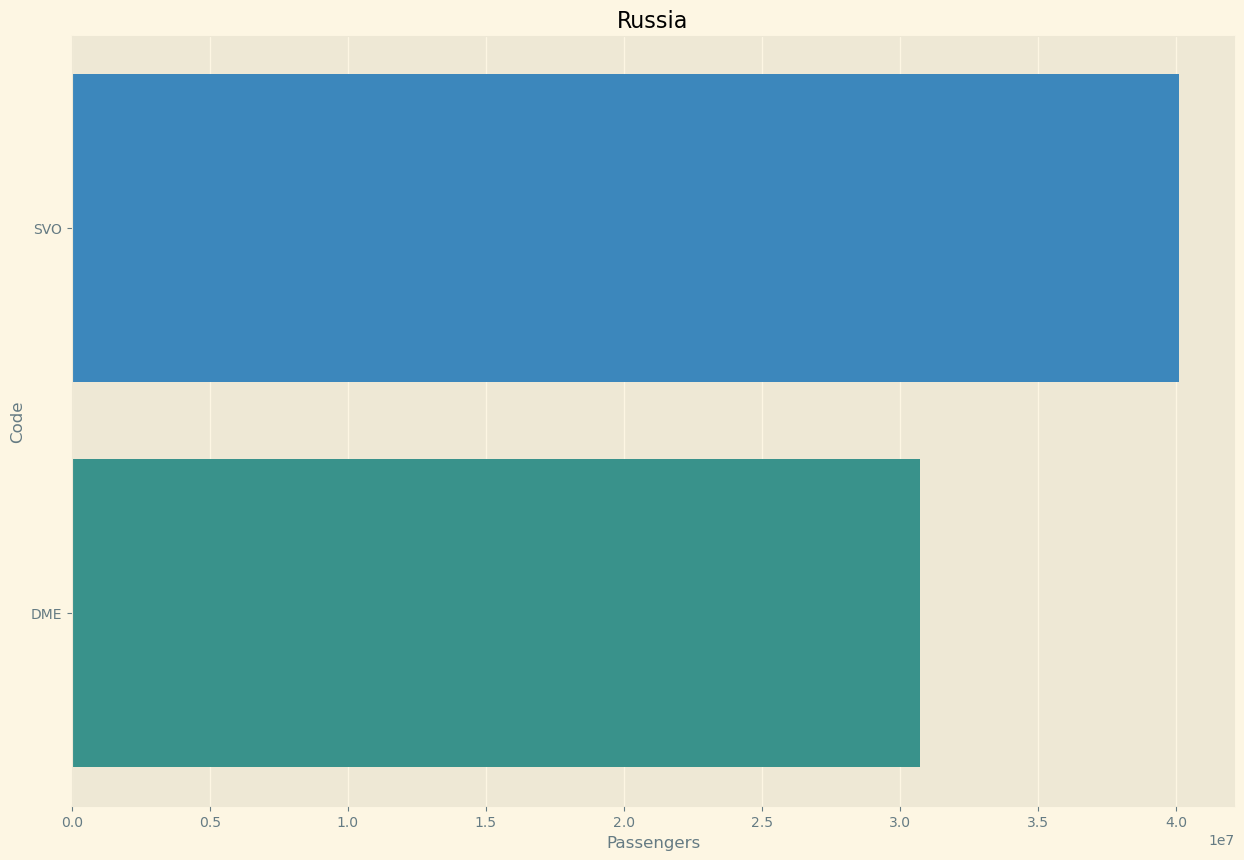

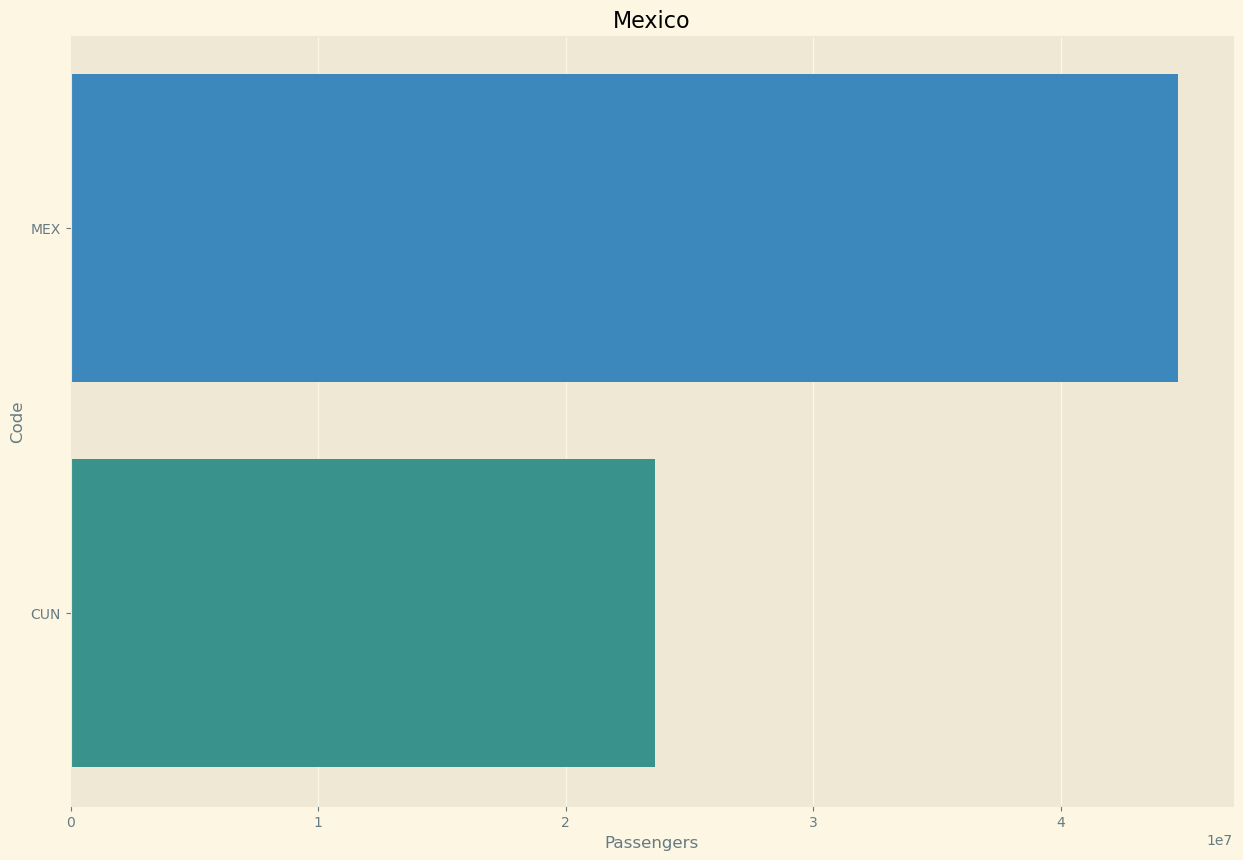

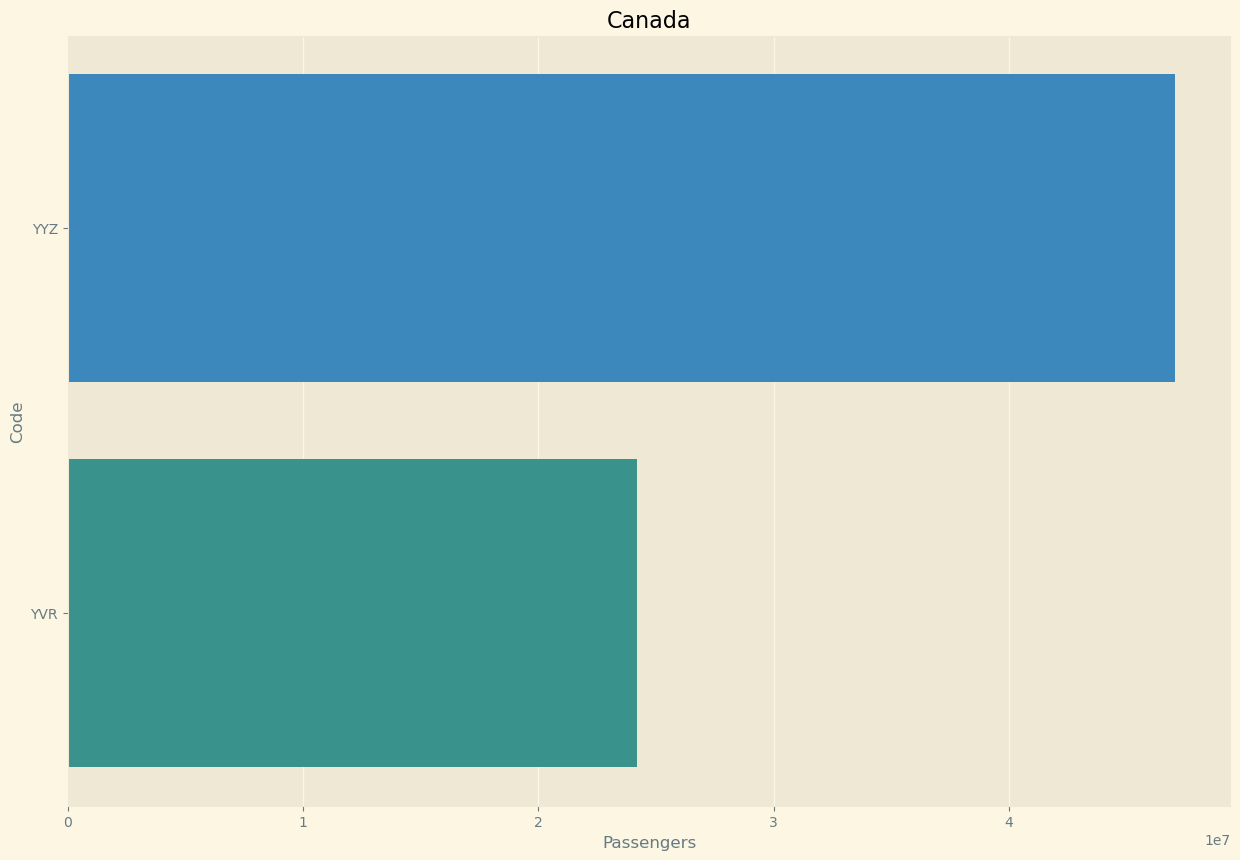

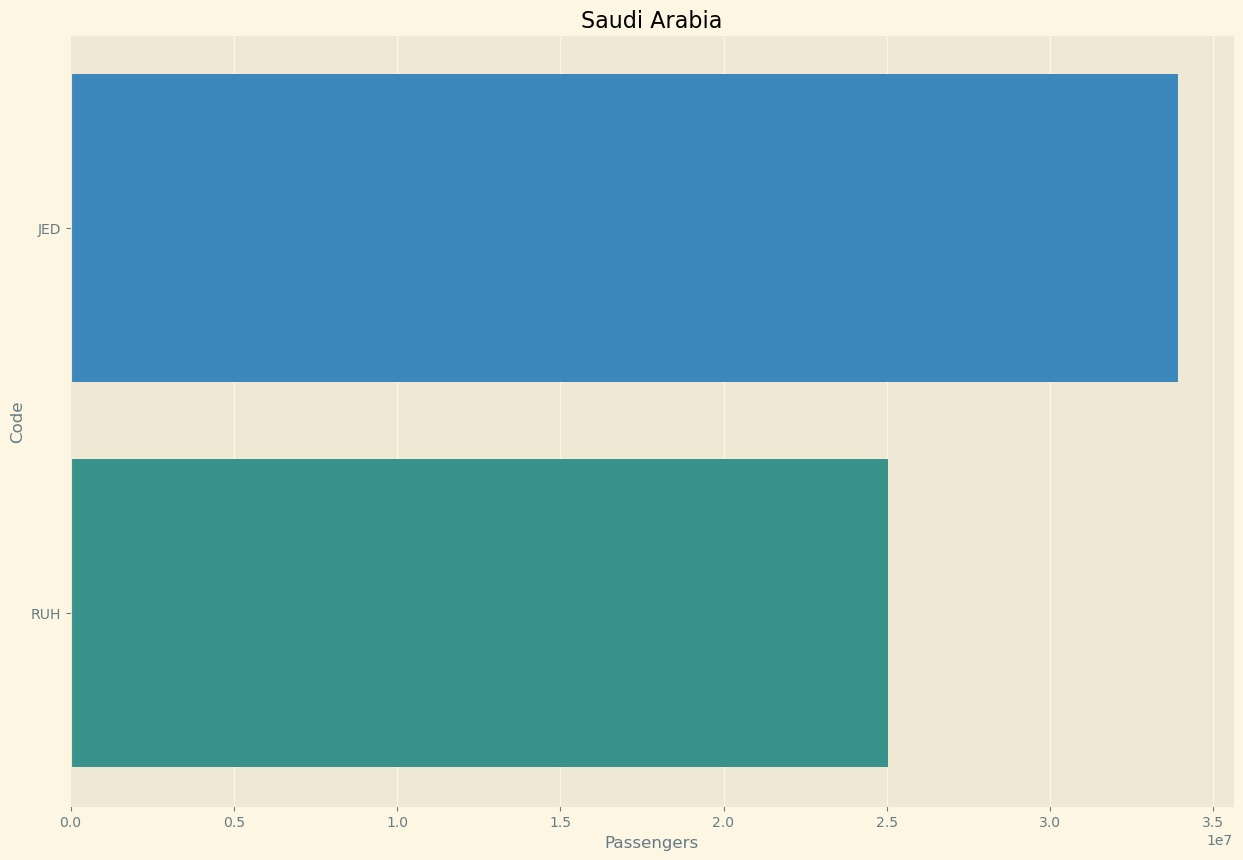

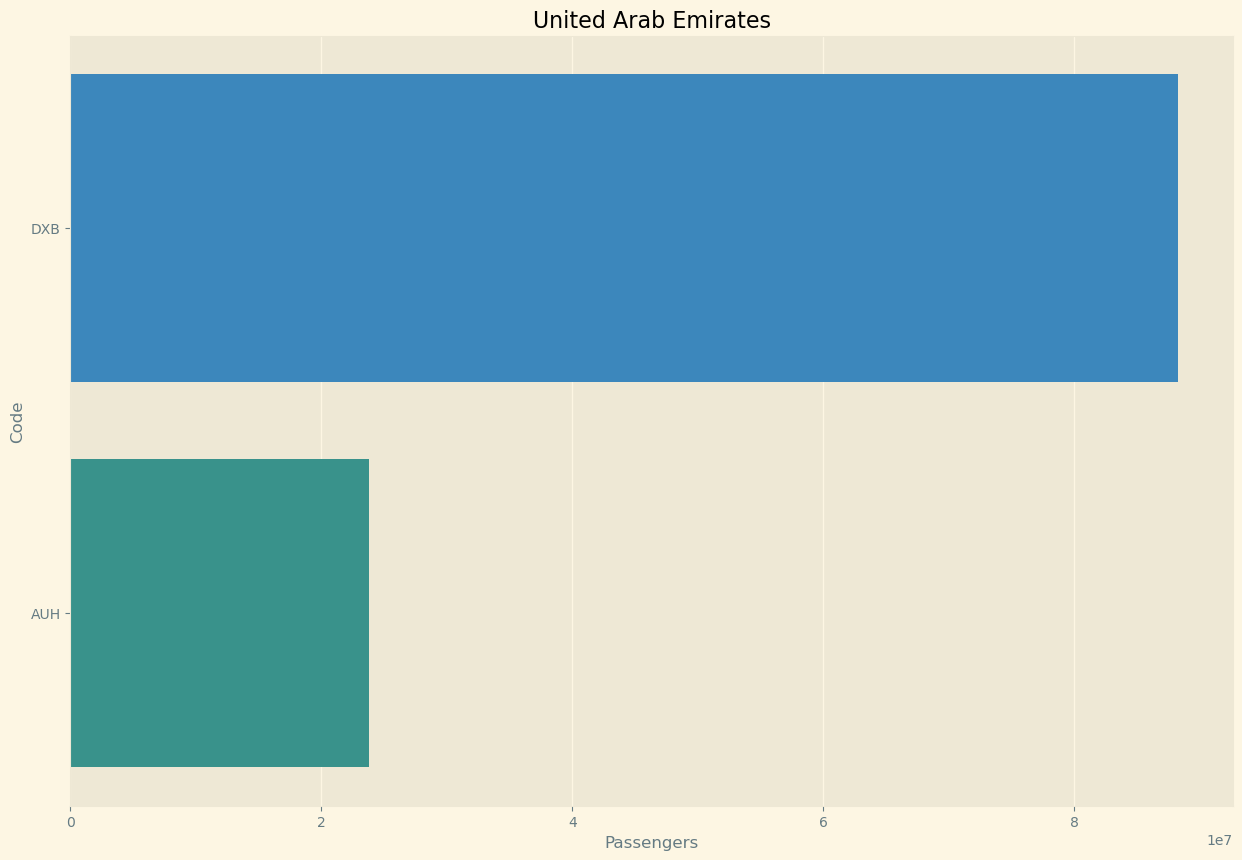

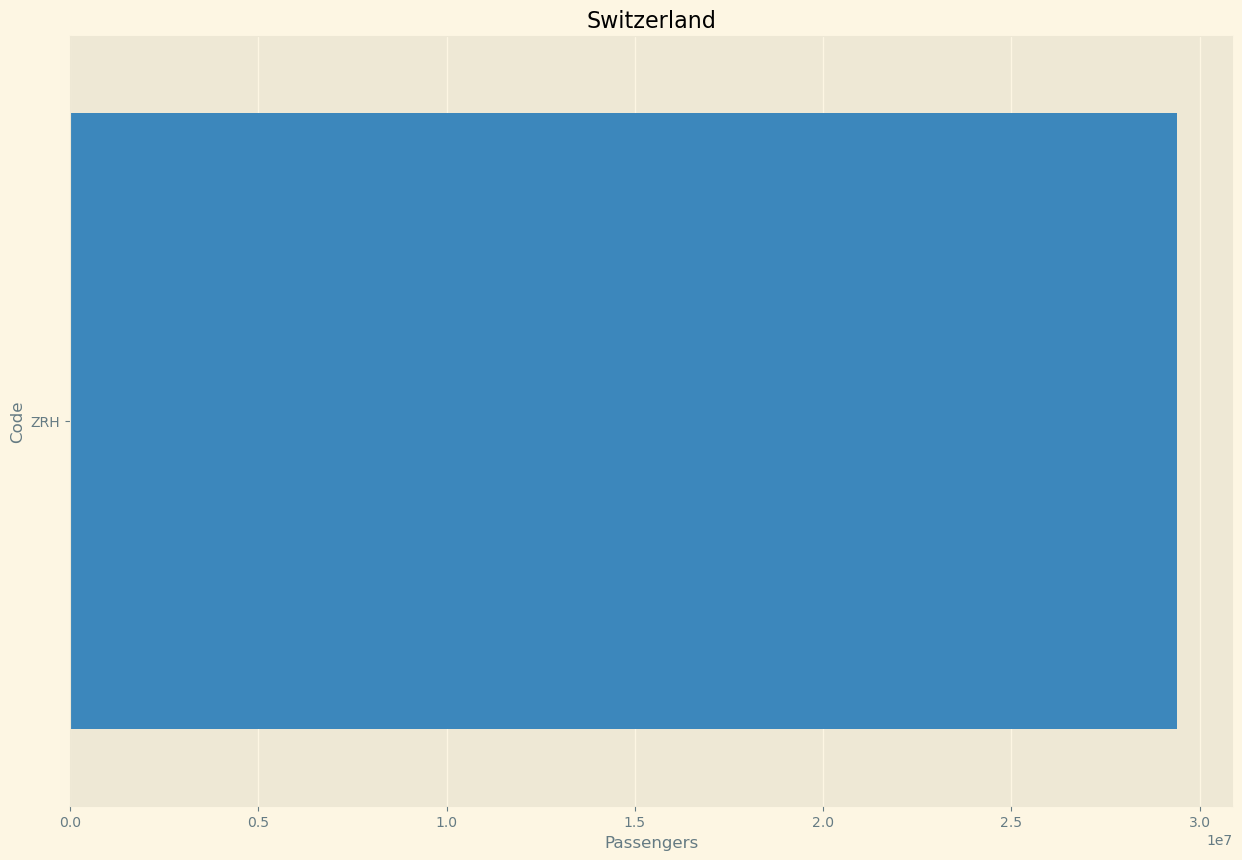

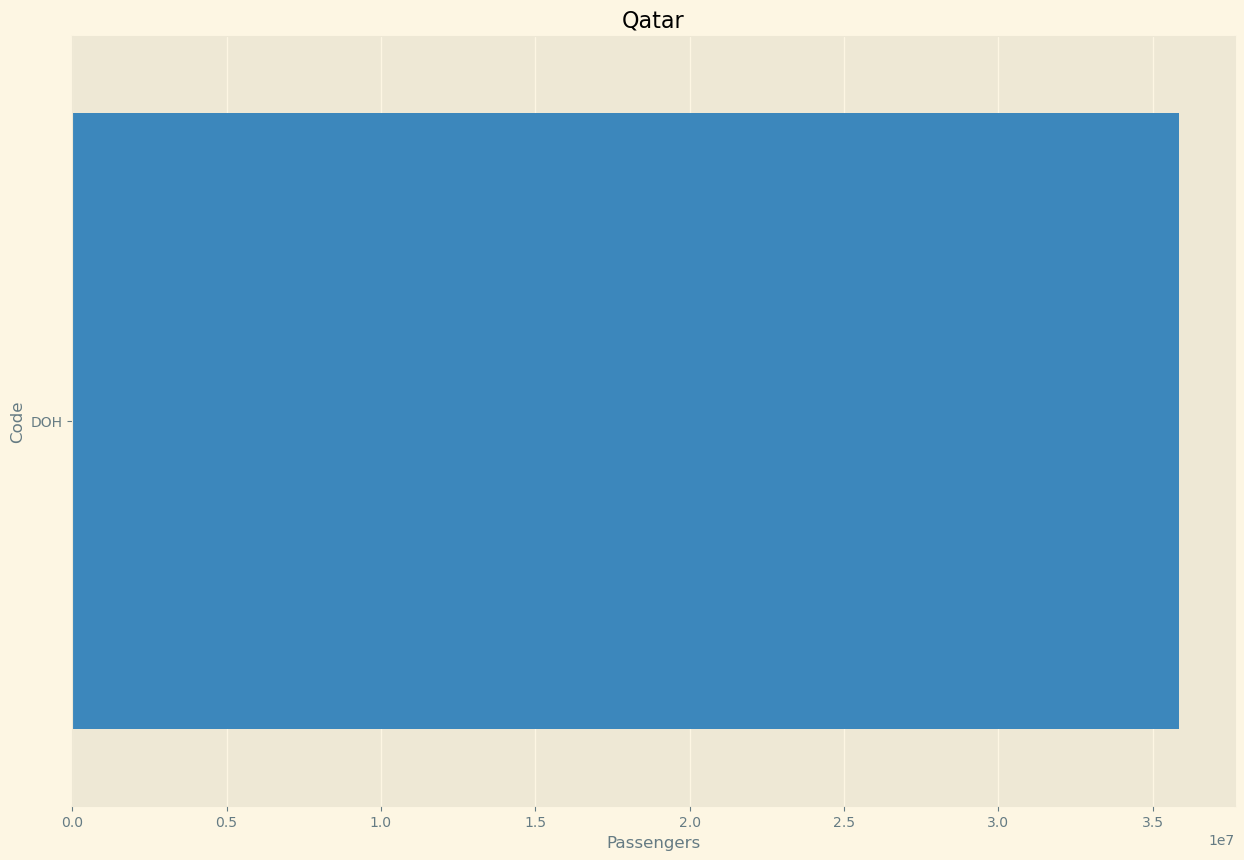

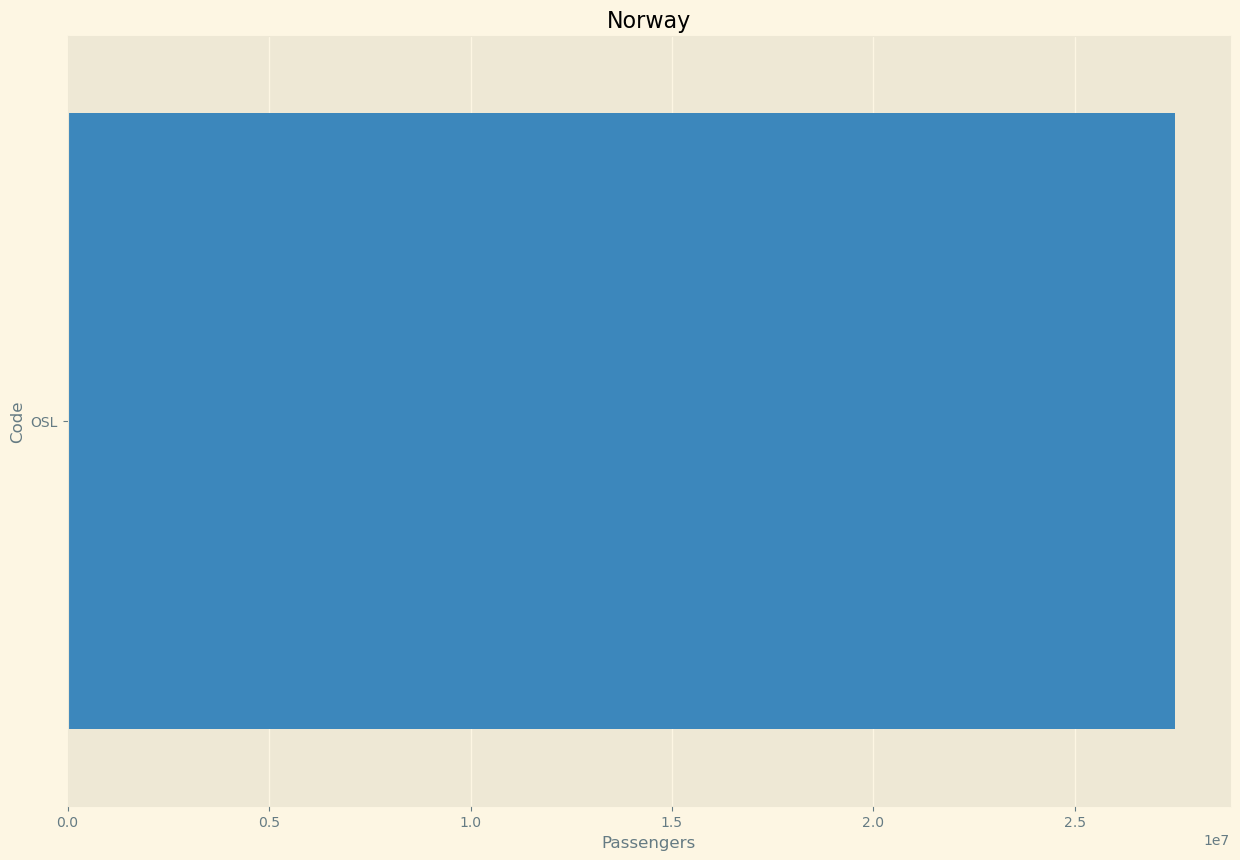

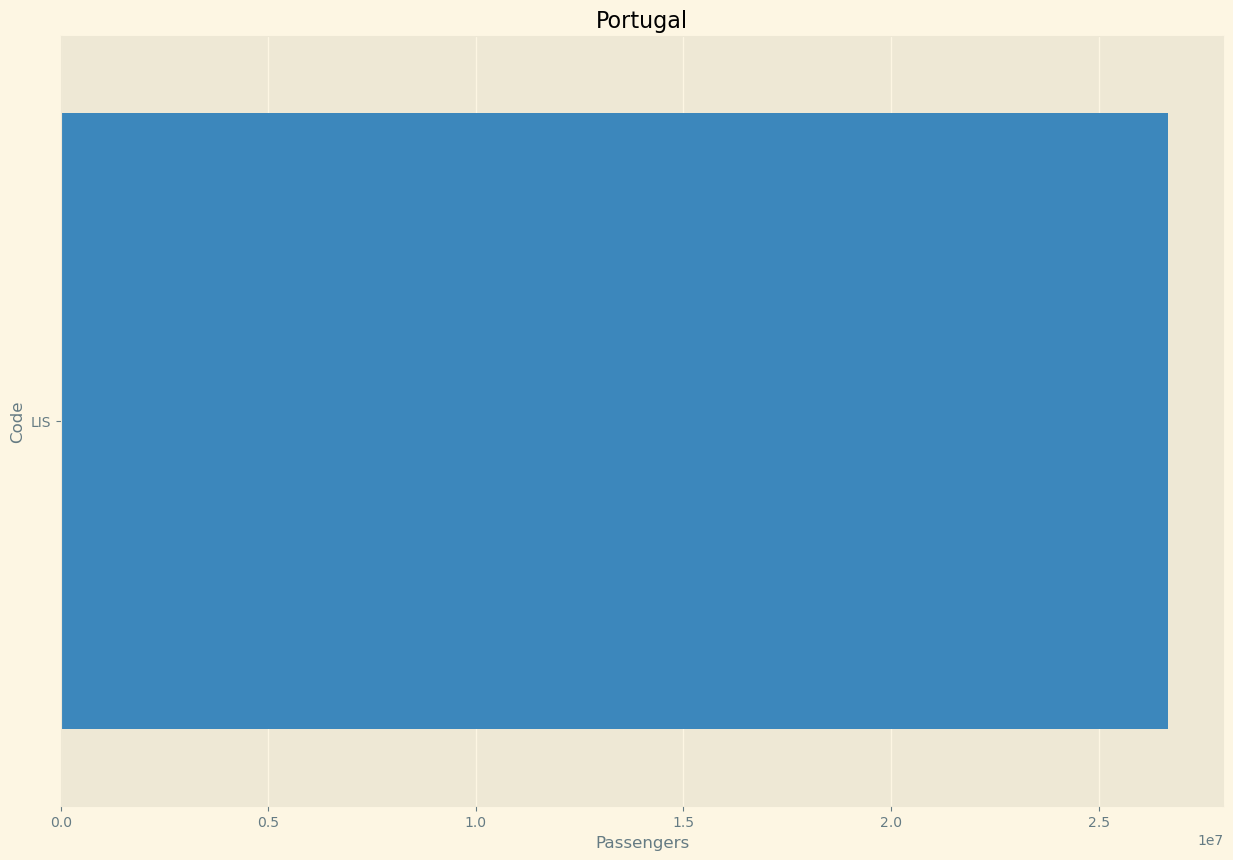

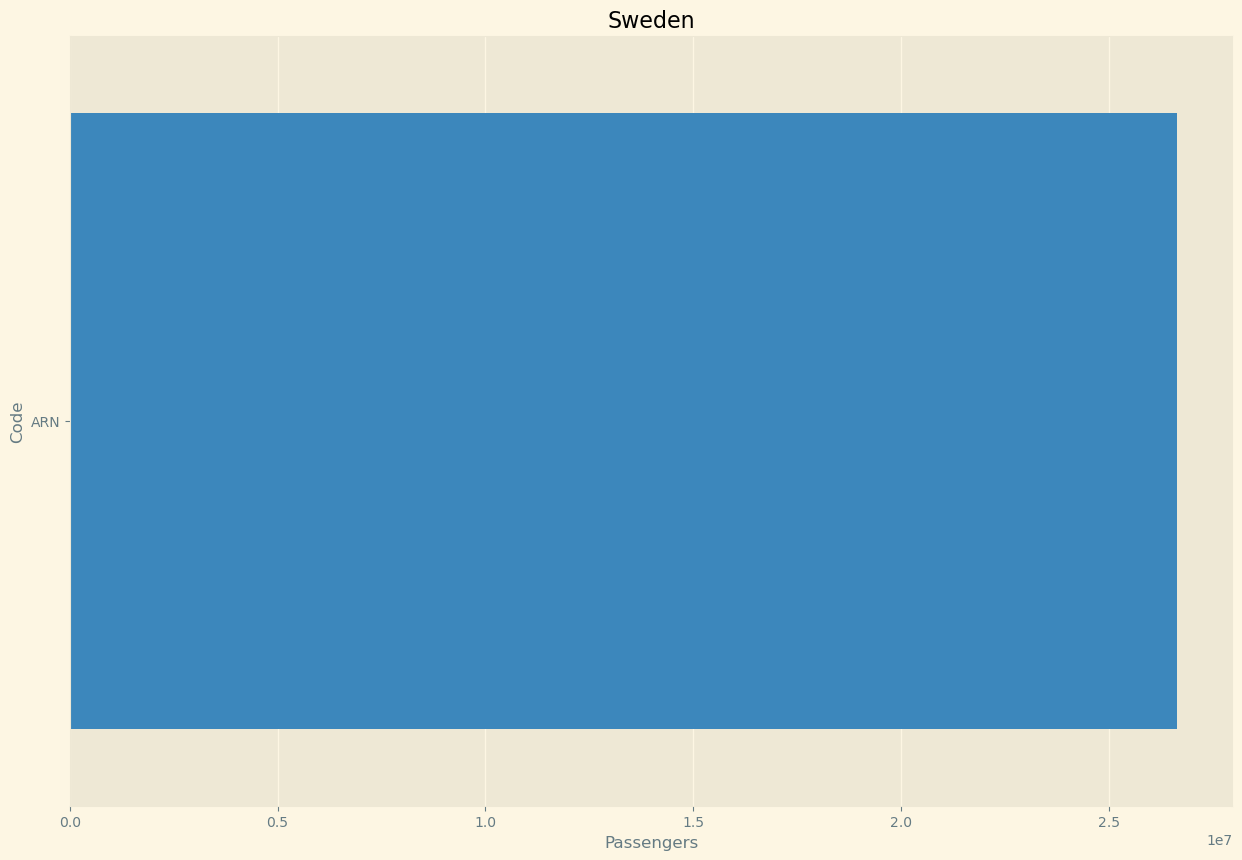

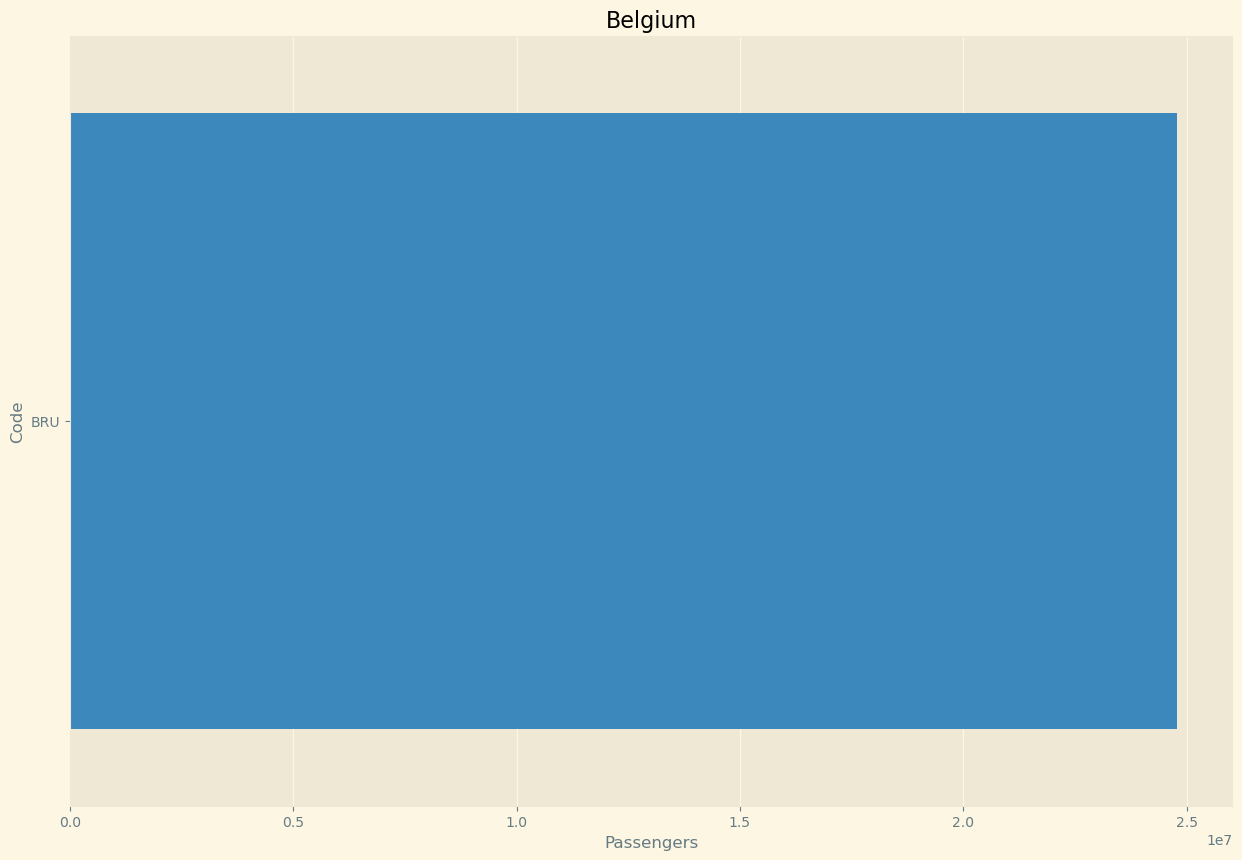

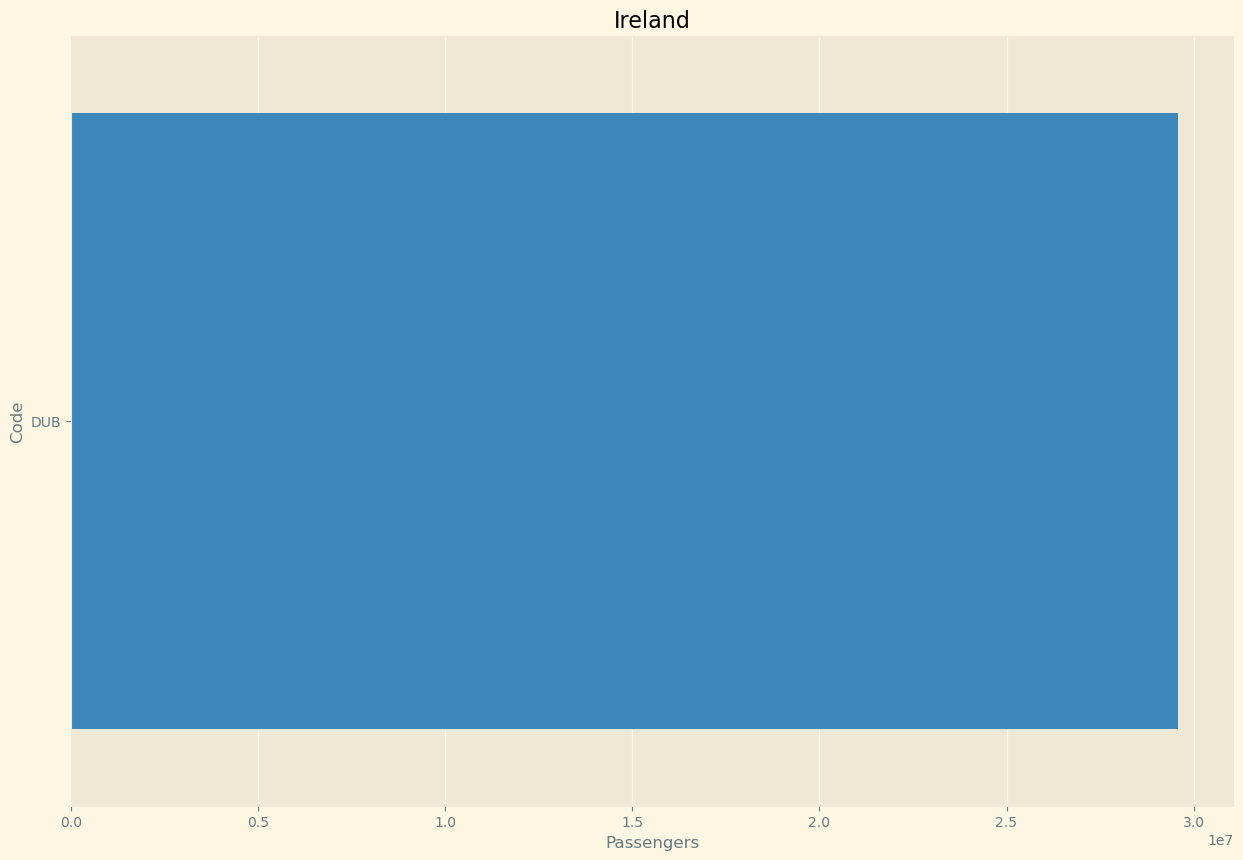

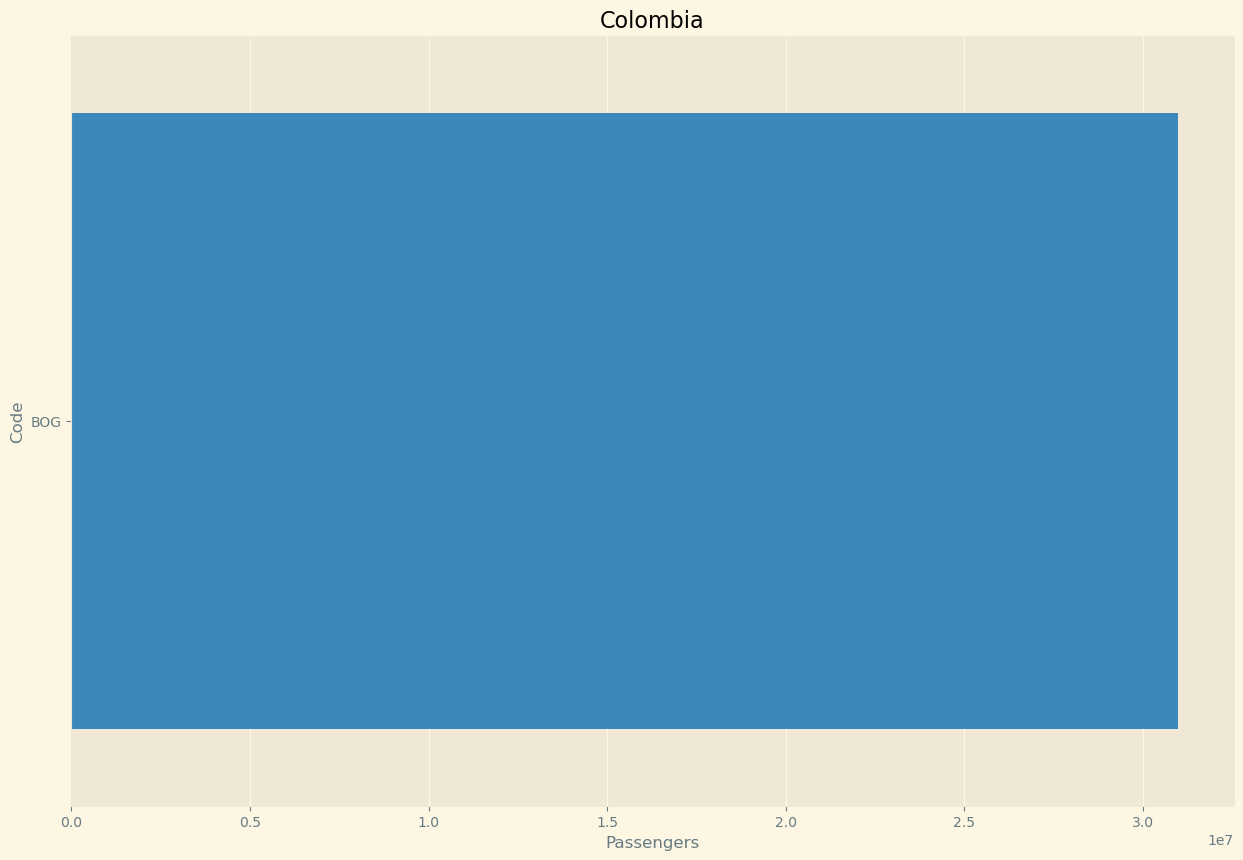

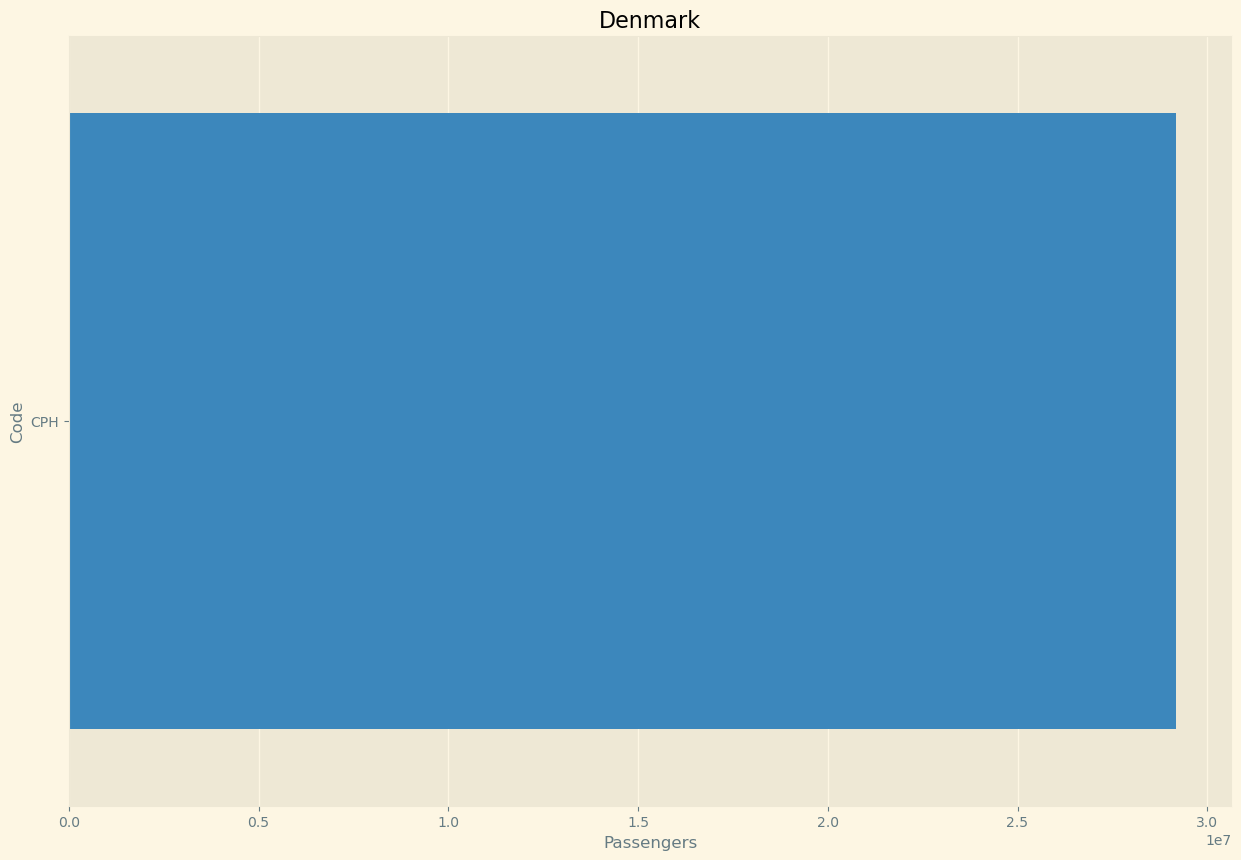

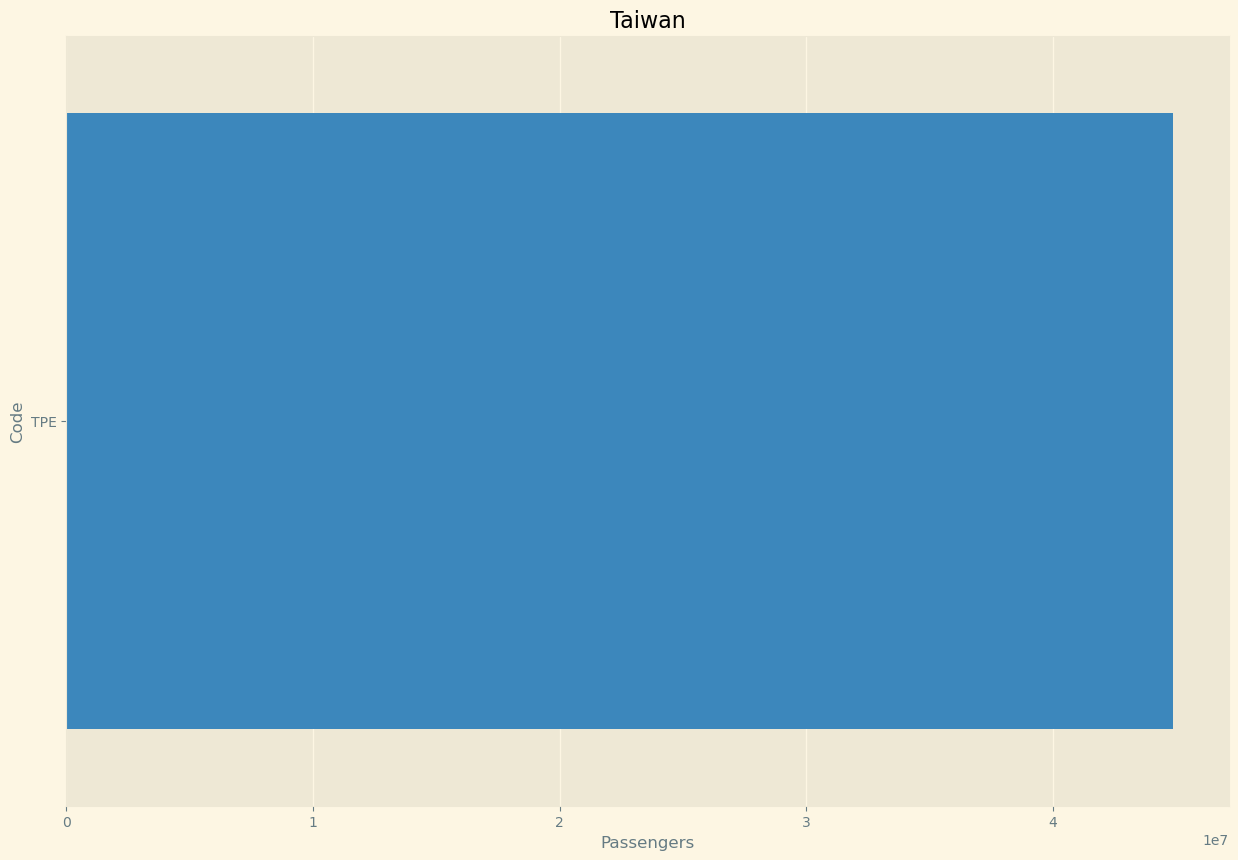

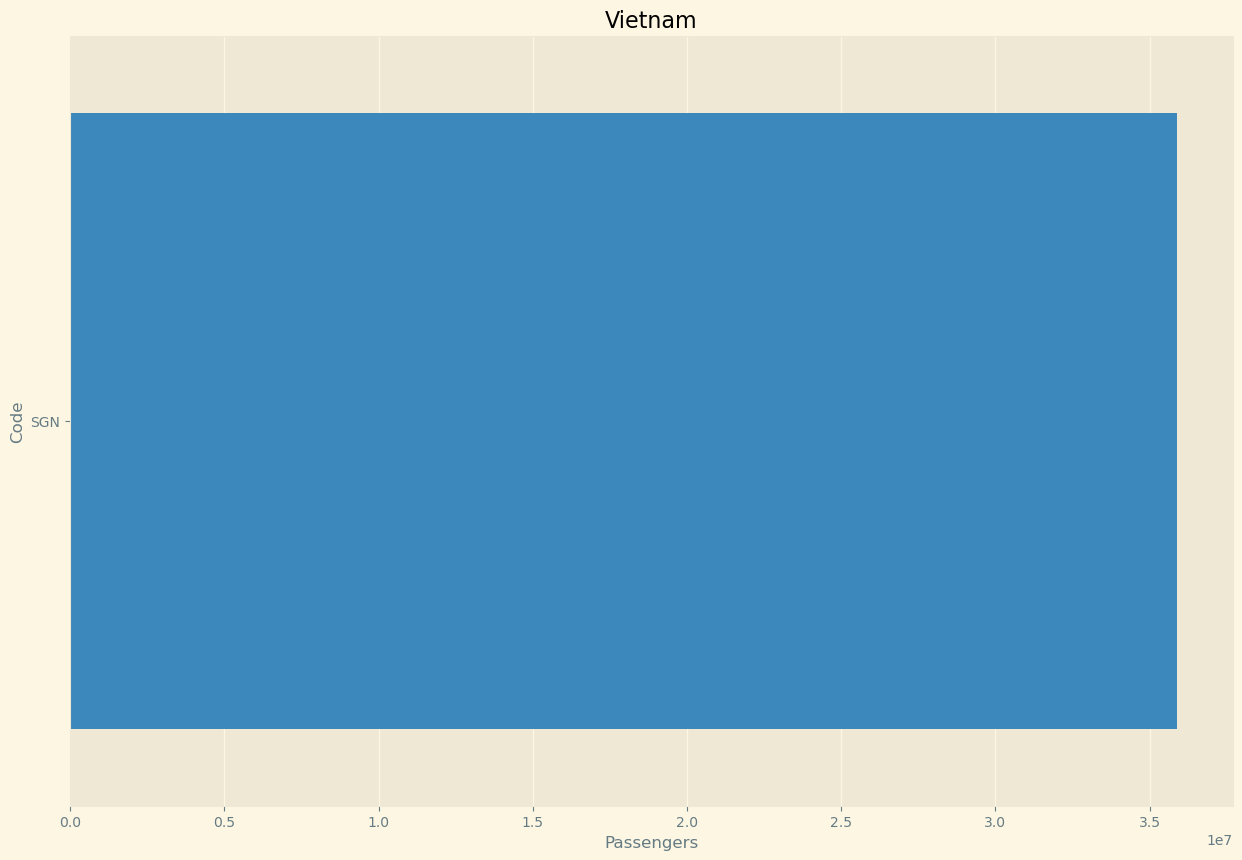

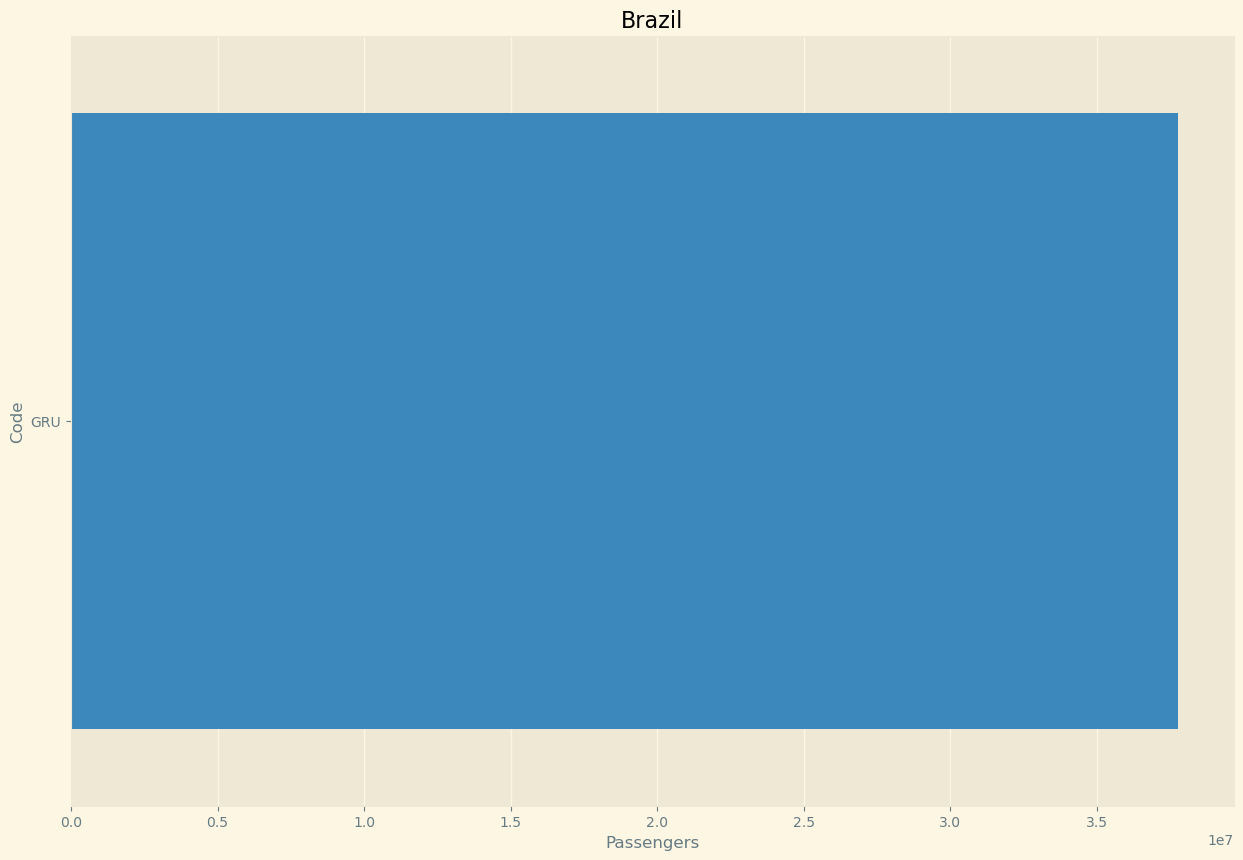

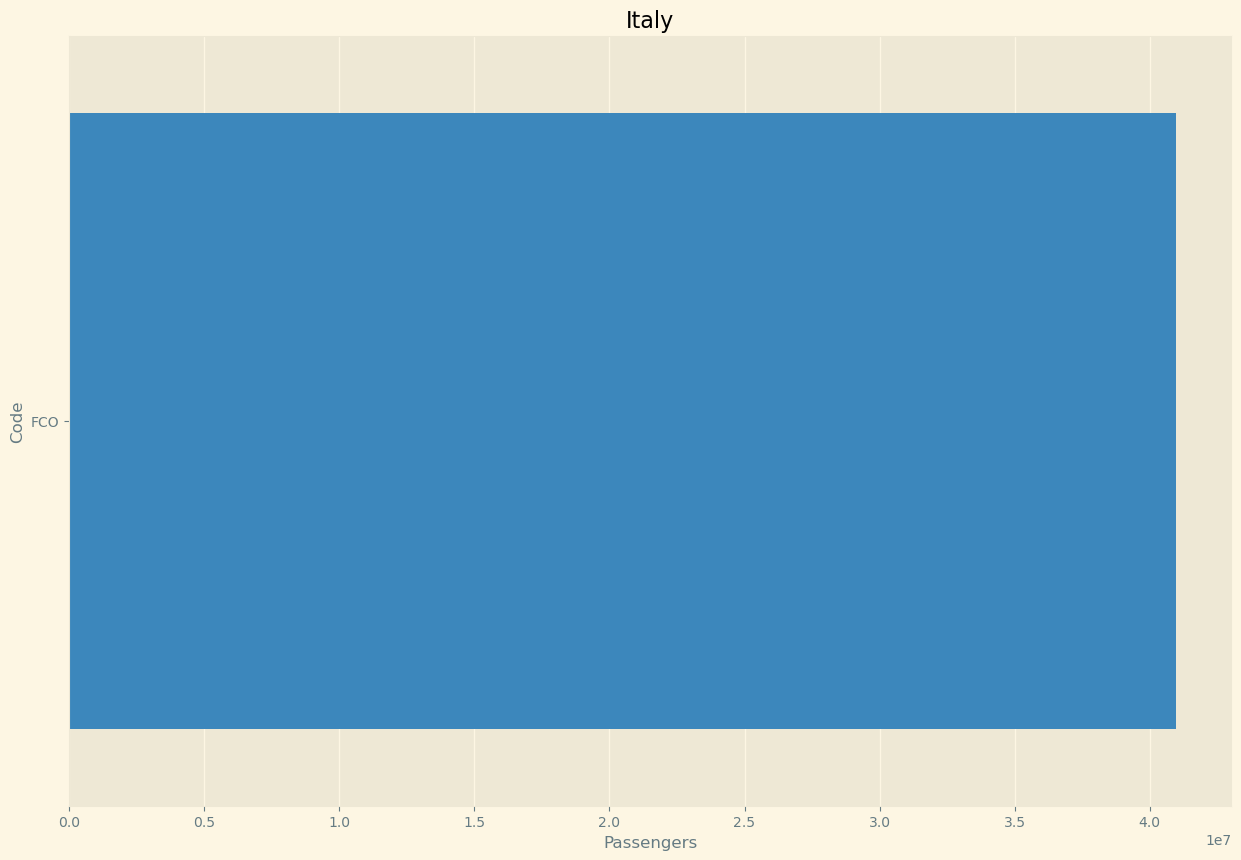

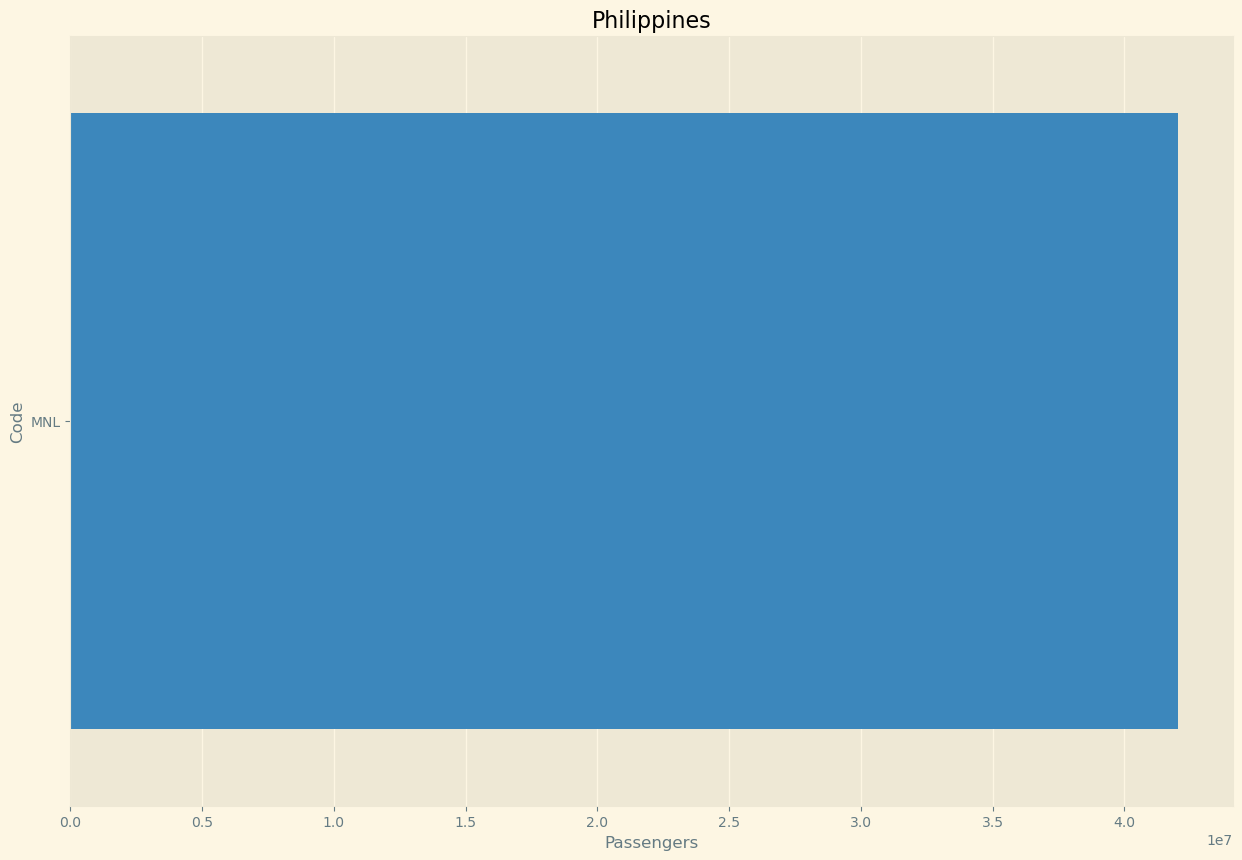

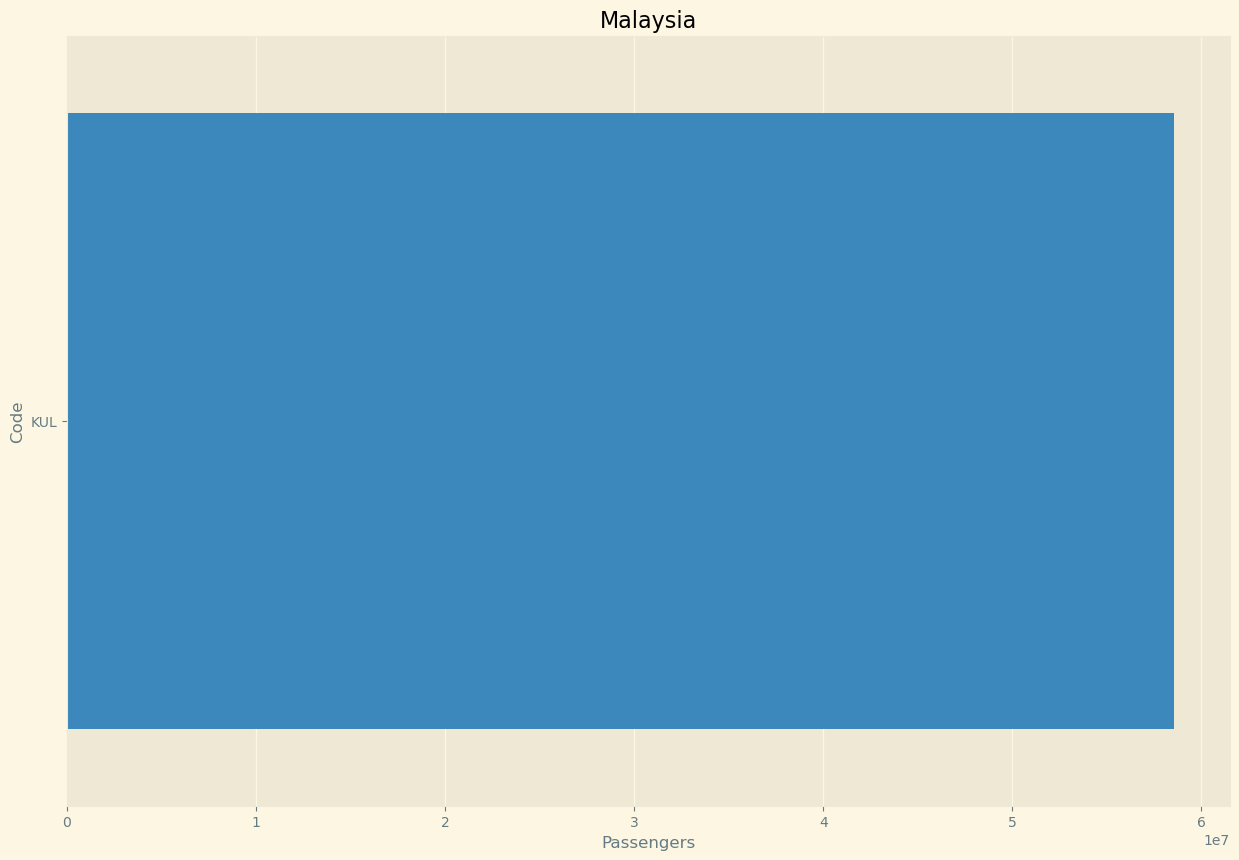

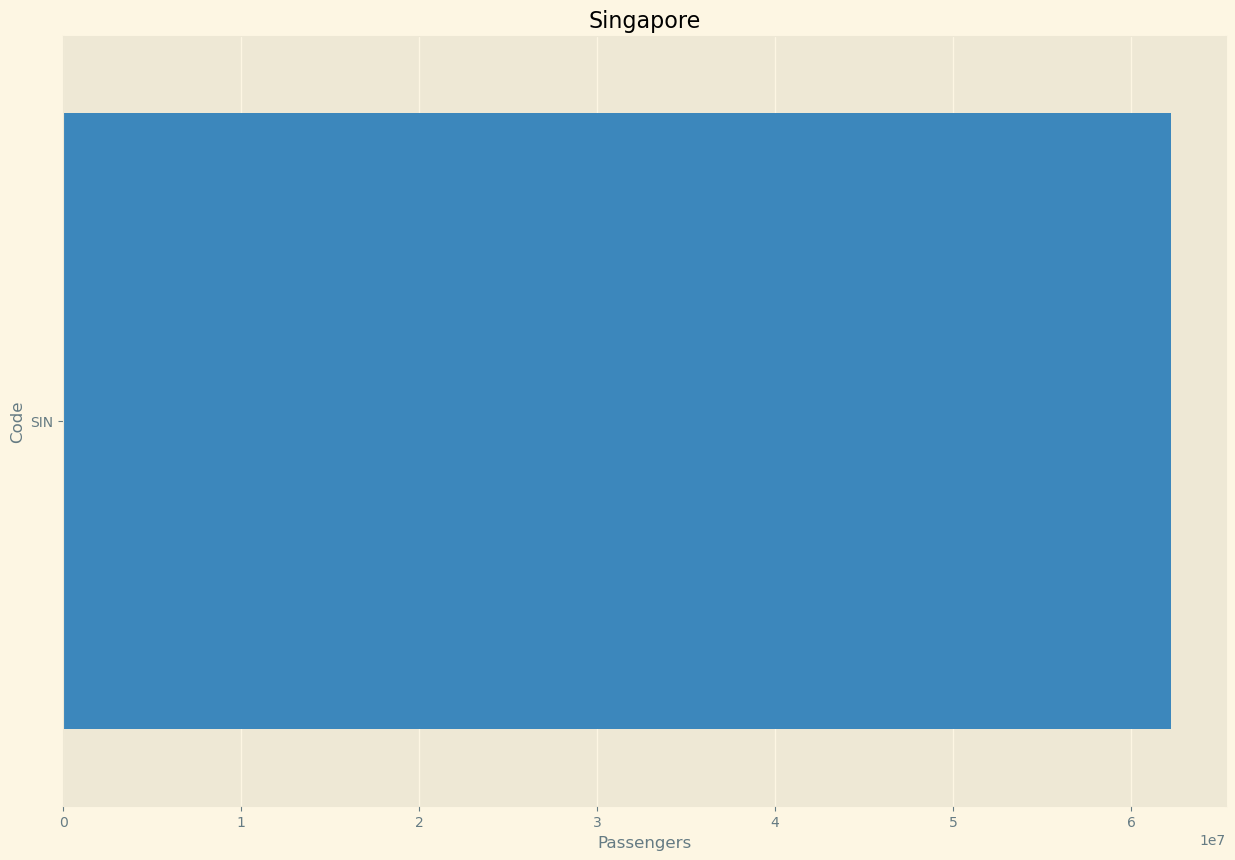

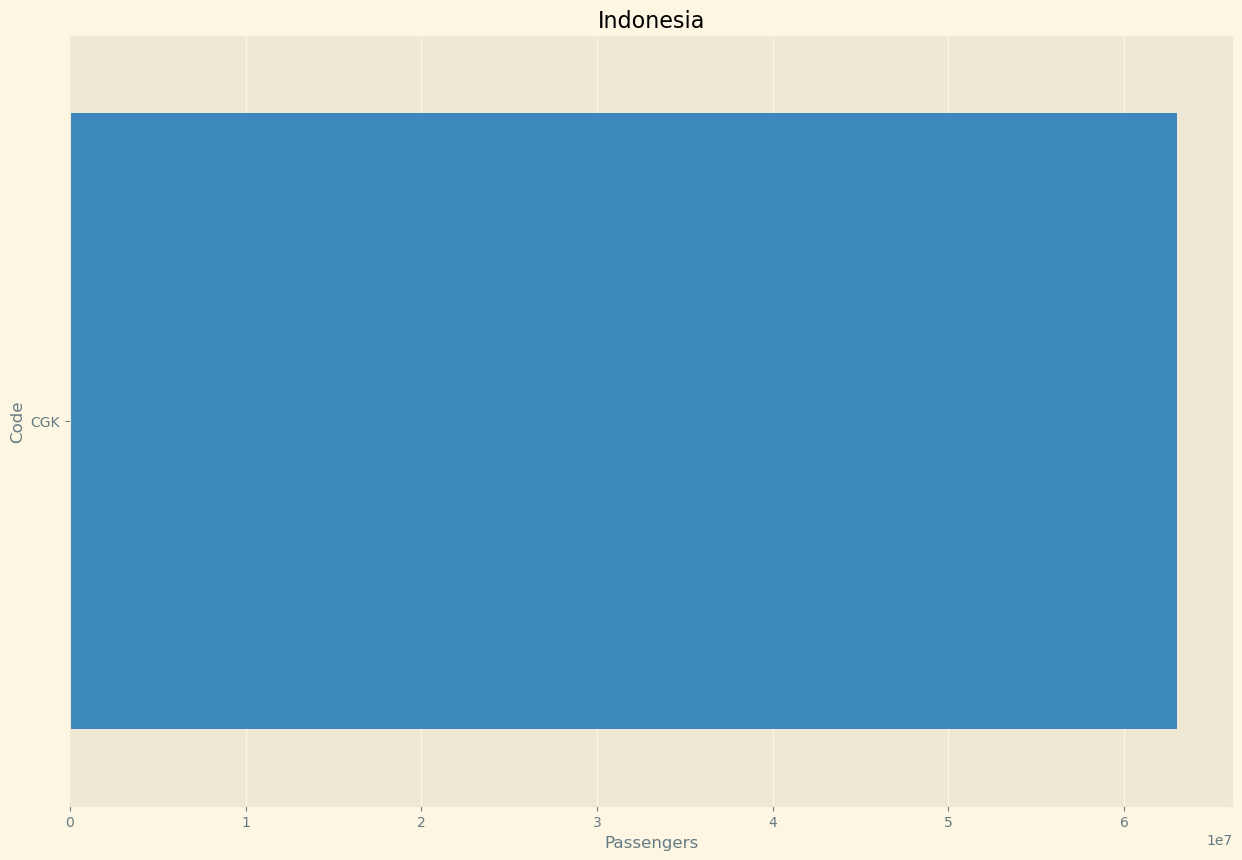

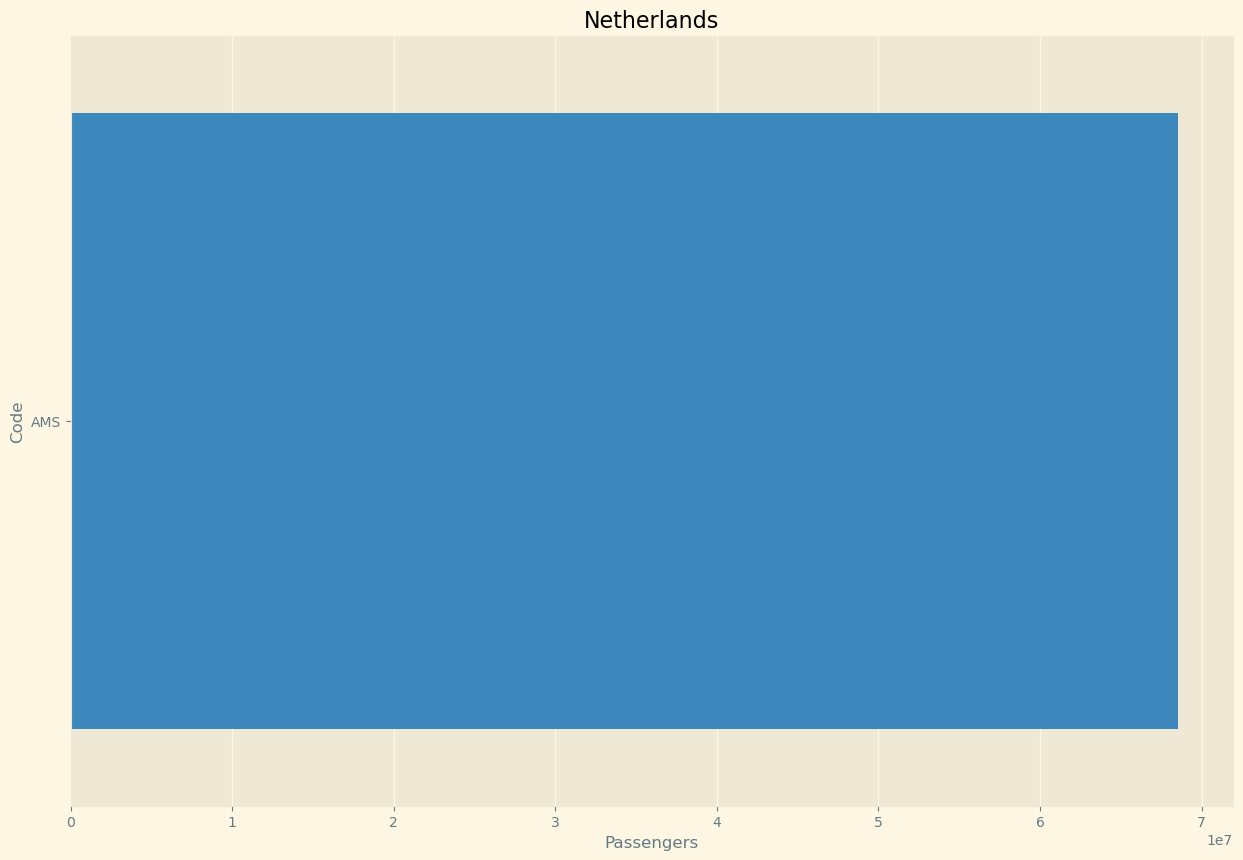

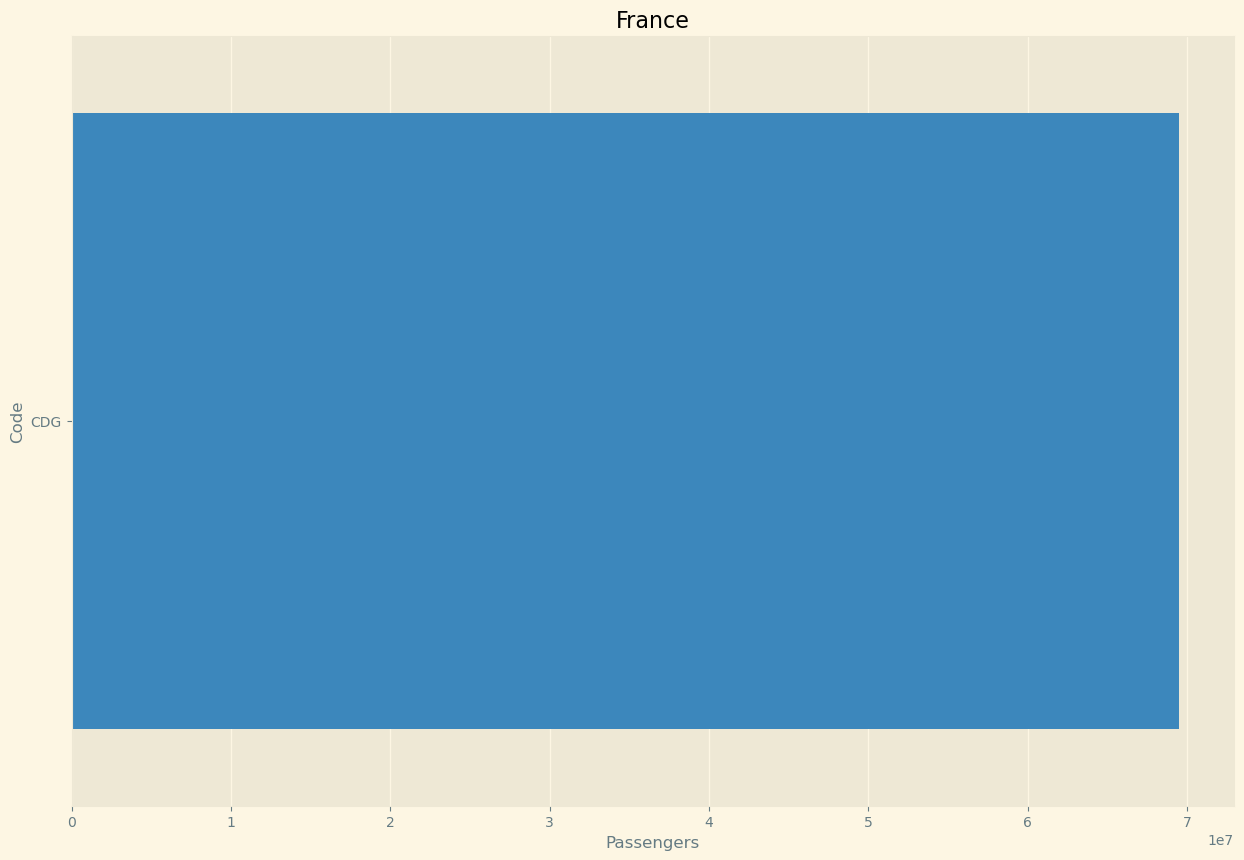

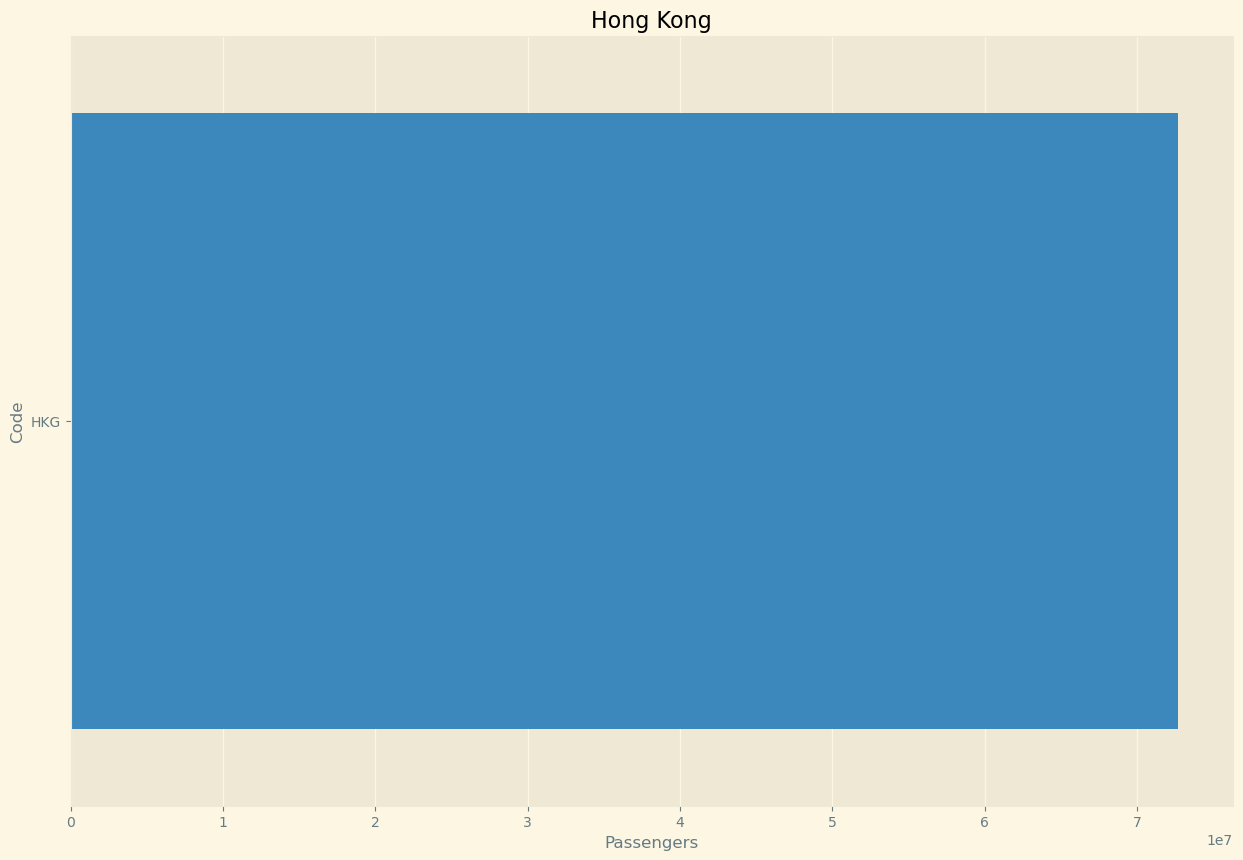

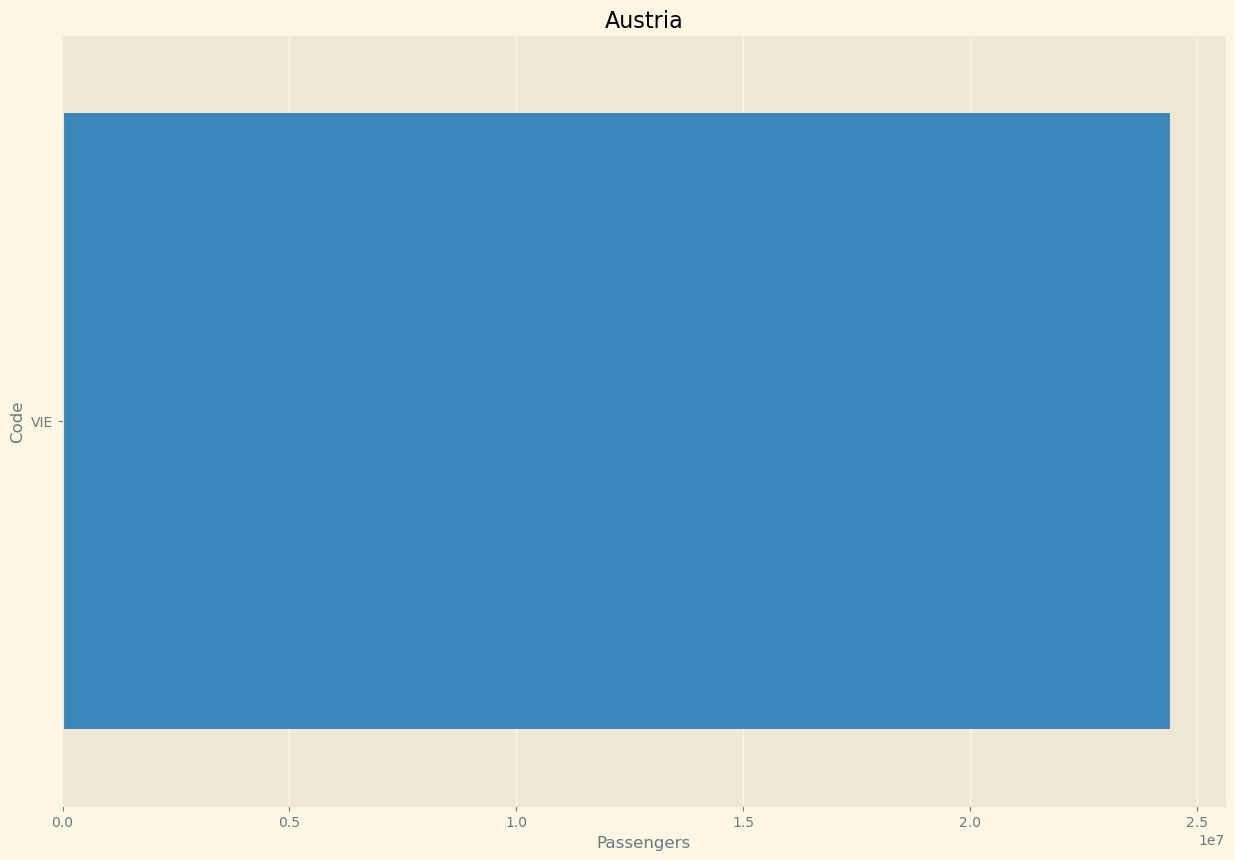

In [9]:
# A collect of airport per country
#as well as a ranking of each airport in the country. 
for c,n in lst:
    country = data[data.Country == c]
    with plt.style.context('Solarize_Light2'):
        plt.figure(figsize=(15,10))
        plt.title(c)
        sns.barplot(data = country, x = 'Passengers', y = 'Code',orient = 'h')

In [10]:
# group the countries and rank by passengers travling. And limiting to top 10
top_country =  data.groupby('Country').agg({'Passengers':'sum'}).sort_values(by = 'Passengers', ascending = False).nlargest(10, columns = 'Passengers')
top_country = top_country.reset_index()

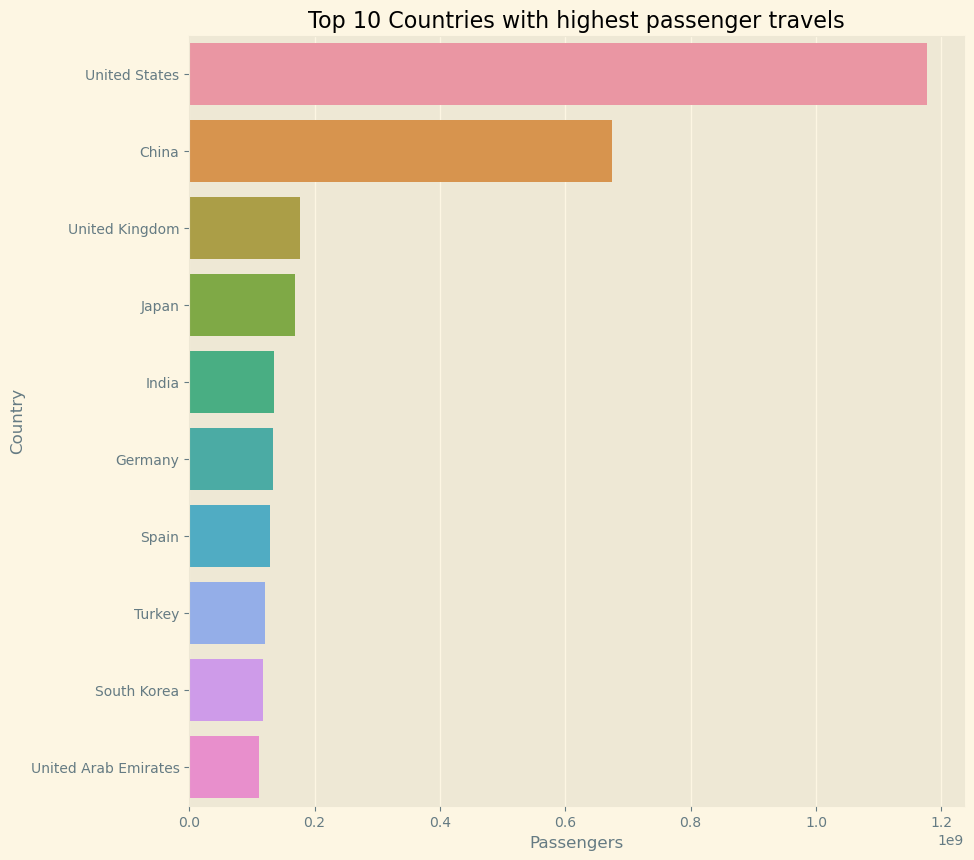

In [11]:
# graphing the top 10 countries

with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(10,10))
    plt.title('Top 10 Countries with highest passenger travels')
    sns.barplot(data = top_country, x = 'Passengers', y = 'Country', orient = 'h')

## Conclusion

There isn't much to really explore with this dataset. It's simple that we just notice a ranking of each country by how many passengers travel from their airports. This dataset doesn't show where the passsengers travels to, so no inferences can be made. 